In [1]:
import os
import pandas as pd
import datetime
from datetime import timedelta
import json
import numpy as np
from pandas import option_context

## Constant and events file location

In [2]:
'''
UPPER_TIME_THRESHOLD, LOWER_TIME_THRESHOLD: Time threshold for concluding that a pair of events belong to the same activity
JSON_FOR_EACH_ACTIVITY: To create a json file for each activity
EVENTS_DATE_THRESHOLD: Date after which the events need to be considered (date after which we have all the events made by all the contributors)
'''
UPPER_TIME_THRESHOLD = '0 days 00:00:02'
LOWER_TIME_THRESHOLD = '-1 days +23:59:58'
JSON_FOR_EACH_ACTIVITY = False
EVENTS_DATE_THRESHOLD = '2022-11-25T09:54:52Z'

In [3]:
loc = '' # folder to find the events file
file = '' # file name for events

## Creating folders for bot and human activities

In [4]:
if JSON_FOR_EACH_ACTIVITY:
    path = f'{loc}/Activity/bot_activities'
    if not os.path.exists(path):
        os.makedirs(path)
    path = f'{loc}/Activity/human_activities'
    if not os.path.exists(path):
        os.makedirs(path)

In [5]:
df_events = pd.read_csv(f'{loc}/{file}',index_col=0).query('created_at >= @EVENTS_DATE_THRESHOLD')

/Users/natarajanchidambaram/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
'''
Converting the timestamps to pandas datetime format for easy processing
'''
df_events['PR_number'] = df_events['PR_number'].astype('Int64')
df_events['issue_number'] = df_events['issue_number'].astype('Int64')
df_events['num_comments'] = df_events['num_comments'].astype('Int64')
df_events['commit_size'] = df_events['commit_size'].astype('Int64')
df_events['commit_distinct_size'] = df_events['commit_distinct_size'].astype('Int64')
df_events['num_commits'] = df_events['num_commits'].astype('Int64')
df_events['num_changed_files'] = df_events['num_changed_files'].astype('Int64')

df_events['created_at'] = pd.to_datetime(df_events.created_at, errors='coerce').dt.tz_localize(None)
df_events['issue_created_at'] = pd.to_datetime(df_events.issue_created_at, errors='coerce').dt.tz_localize(None)
df_events['issue_closed_at'] = pd.to_datetime(df_events.issue_closed_at, errors='coerce').dt.tz_localize(None)
df_events['release_created_at'] = pd.to_datetime(df_events.release_created_at, errors='coerce').dt.tz_localize(None)
df_events['PR_created_at'] = pd.to_datetime(df_events.PR_created_at, errors='coerce').dt.tz_localize(None)
df_events['PR_updated_at'] = pd.to_datetime(df_events.PR_updated_at, errors='coerce').dt.tz_localize(None)
df_events['PR_merged_at'] = pd.to_datetime(df_events.PR_merged_at, errors='coerce').dt.tz_localize(None)
df_events['PR_closed_at'] = pd.to_datetime(df_events.PR_merged_at, errors='coerce').dt.tz_localize(None)

with option_context('display.max_column', None):
    display(df_events.drop_duplicates())

,event_id,event_type,login,action,created_at,repository,issue_number,state,issue_created_at,issue_closed_at,close_reason,issue_node_id,PR_number,PR_created_at,PR_updated_at,PR_closed_at,PR_merged_at,merged,PR_node_id,comment,num_comments,num_commits,num_review_comments,review_node_id,review_state,num_changed_files,comment_node_id,title,body,draft,tag_name,tag_description,release_name,prerelease,ref_type,ref,page_name,page_title,description,release_node_id,push_id,commit_distinct_size,commit_id,commit_size,release_created_at,acc_type
849,25478577031,PullRequestReviewEvent,renovate-approve-2[bot],created,2022-11-25 17:06:11,renovatebot/renovate-approve-bot-bitbucket-cloud,<NA>,open,NaT,NaT,NaN,NaN,353,2022-11-25 17:06:09,2022-11-25 17:06:10,NaT,NaT,NaN,PR_kwDOGJwOm85DuImX,NaN,<NA>,<NA>,NaN,PRR_kwDOGJwOm85HNRVd,approved,<NA>,NaN,chore(deps): update github/codeql-action actio...,[![Mend Renovate](https://app.renovatebot.com/...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaT,bot
850,25478411358,PullRequestReviewEvent,renovate-approve-2[bot],created,2022-11-25 16:54:49,dev-hato/actions-create-release,<NA>,open,NaT,NaT,NaN,NaN,428,2022-11-25 16:54:46,2022-11-25 16:54:48,NaT,NaT,NaN,PR_kwDOHobBWM5DuGPh,NaN,<NA>,<NA>,NaN,PRR_kwDOHobBWM5HNPSN,approved,<NA>,NaN,Update dependency renovate to v34.35.1,[![Mend Renovate](https://app.renovatebot.com/...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaT,bot
851,25478312044,PullRequestReviewEvent,renovate-approve-2[bot],created,2022-11-25 16:47:37,dev-hato/hato-bot,<NA>,open,NaT,NaT,NaN,NaN,1945,2022-11-25 16:47:35,2022-11-25 16:47:37,NaT,NaT,NaN,PR_kwDODJszAM5DuFGc,NaN,<NA>,<NA>,NaN,PRR_kwDODJszAM5HNOEt,approved,<NA>,NaN,Update dependency renovate to v34.35.1,[![Mend Renovate](https://app.renovatebot.com/...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaT,bot
852,25478192735,PullRequestReviewEvent,renovate-approve-2[bot],created,2022-11-25 16:39:14,dev-hato/hato-atama,<NA>,open,NaT,NaT,NaN,NaN,2109,2022-11-25 16:39:12,2022-11-25 16:39:13,NaT,NaT,NaN,PR_kwDOEeATuM5DuDWB,NaN,<NA>,<NA>,NaN,PRR_kwDOEeATuM5HNMkb,approved,<NA>,NaN,Update dependency renovate to v34.35.1,[![Mend Renovate](https://app.renovatebot.com/...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaT,bot
853,25478082236,PullRequestReviewEvent,renovate-approve-2[bot],created,2022-11-25 16:31:32,dev-hato/hato-atama,<NA>,open,NaT,NaT,NaN,NaN,2108,2022-11-25 16:31:30,2022-11-25 16:31:32,NaT,NaT,NaN,PR_kwDOEeATuM5DuCF1,NaN,<NA>,<NA>,NaN,PRR_kwDOEeATuM5HNLKP,approved,<NA>,NaN,Update dependency renovate to v34.35.0,[![Mend Renovate](https://app.renovatebot.com/...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaT,bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155444,26655470172,CreateEvent,bryanyang0528,NaN,2023-01-25 16:32:11,bryanyang0528/lang-traditional-chinese-zh-tw,<NA>,NaN,NaT,NaT,NaN,NaN,<NA>,NaT,NaT,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,Traditional Language pack for Flarum Flarum v1...,NaN,NaN,tag,1.0.0,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaT,human
155445,26654996929,PushEvent,bryanyang0528,NaN,2023-01-25 16:13:29,bryanyang0528/lang-traditional-chinese-zh-tw,<NA>,NaN,NaT,NaT,NaN,NaN,<NA>,NaT,NaT,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,refs/heads/master,NaN,NaN,NaN,NaN,1.240067e+10,1,NaN,1,NaT,human
155446,26654791197,PushEvent,bryanyang0528,NaN,2023-01-25 16:05:34,bryanyang0528/lang-traditional-chinese,<NA>,NaN,NaT,NaT,NaN,NaN,<NA>,NaT,NaT,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,refs/heads/master,NaN,NaN,NaN,NaN,1.240058e+10,1,NaN,1,NaT,human
155447,26654262549,ForkEvent,bryanyang0528,forked,2023-01-25 15:45:04,pattinsonfuture/lang-traditional-chinese,<NA>,NaN,NaT,NaT,NaN,NaN,<NA>,NaT

In [7]:
'''
list_event_id_covered - event_ids that are already processed
all_events - event_ids corresponding to the set of events that might belong to an activity 
pair_events - event_ids that are considered to belong to an activity
'''
list_event_id_covered = []
all_events = []
pair_events = []

In [8]:
'''
fields that will be present under each object within an activity
'''
issue_field = ['id','title','created_at','status','closed_at','resolved','GH_node']
pr_field = ['id','title','created_at','status','closed_at','merged','GH_node']
gitref = ['type','name','tag_description_length']
release = ['name','description_length','created_at','prerelease','new_tag','GH_node']

## Identifying activities from events

#### Creating repository

In [9]:
'''
Filter data based on CreateEvent with ref_type as repository
'''
create_repository = (
    df_events
    .query('event_type == "CreateEvent" and ref_type == "repository"')
    [['event_id','event_type','login','repository','created_at','ref_type','acc_type']]
    .assign(activity='Creating repository')
    .rename(columns={'login':'contributor',
                     'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .drop_duplicates()
)
list_event_id_covered.extend(create_repository['event_id'].to_list())

create_repository=create_repository.sort_values('date')

display(create_repository.query('acc_type=="bot"')[['date','activity','contributor','repository']])

#saving bot events
create_repository_bot=create_repository.query('acc_type=="bot"')
dict_create_repository_bot=create_repository_bot[['date','activity','contributor','repository']].to_dict('records')
for event in dict_create_repository_bot:
    event['payload'] = {}

#saving human events
create_repository_human=create_repository.query('acc_type=="human"')
dict_create_repository_human=create_repository_human[['date','activity','contributor','repository']].to_dict('records')
for event in dict_create_repository_human:
    event['payload'] = {}

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/creating_repository.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_create_repository_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/creating_repository.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_create_repository_human, file_object, indent=4)

,date,activity,contributor,repository
86855,2022-11-26T04:10:31+00:00,Creating repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-and-remov...
86853,2022-11-26T04:10:43+00:00,Creating repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-labels-to...
86851,2022-11-26T04:10:53+00:00,Creating repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-branch-protec...
86849,2022-11-26T04:11:08+00:00,Creating repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-create-file-2...
86847,2022-11-26T04:11:14+00:00,Creating repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-create-status...
...,...,...,...,...
42919,2023-01-25T04:12:09+00:00,Creating repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-lock-issue-20...
42917,2023-01-25T04:12:25+00:00,Creating repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-paginate-issu...
42903,2023-01-25T04:13:08+00:00,Creating repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-prooject-card...
19459,2023-01-25T14:10:37+00:00,Creating repository,pantheon-ci-bot,pantheon-ci-bot/build-tools-5596


#### Creating branch

In [10]:
'''
Filter data based on CreateEvent and ref_type as branch
'''
create_branch = (
    df_events
    .query('event_type == "CreateEvent" and ref_type == "branch"')
    [['event_id','event_type','login','repository','created_at','ref','acc_type']]
    .assign(activity = 'Creating branch')
    .rename(columns={'login':'contributor', 
                     'created_at':'date',
                     'ref':'name'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(tag_description_length=None)
    .assign(type="branch")
    .drop_duplicates()
)
list_event_id_covered.extend(create_branch['event_id'].to_list())
create_branch['gitref']= (
    create_branch
    [gitref]
    .rename(columns={'tag_description_length':'description_length'})
    .to_dict('records')
)
create_branch=create_branch.sort_values('date')

display(create_branch.query('acc_type=="bot"')[['date','activity','contributor','repository','type','name','tag_description_length']])

#saving bot events
create_branch_bot=create_branch.query('acc_type=="bot"')
dict_create_branch_bot=create_branch_bot[['date','activity','contributor','repository','gitref']].to_dict('records')

#saving human events
create_branch_human=create_branch.query('acc_type=="human"')
dict_create_branch_human=create_branch_human[['date','activity','contributor','repository','gitref']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/creating_branch.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_create_branch_bot, file_object, indent=4)
    
    file_name = f'{loc}/Activity/human_activities/creating_branch.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_create_branch_human, file_object, indent=4)

,date,activity,contributor,repository,type,name,tag_description_length
74886,2022-11-25T10:02:33+00:00,Creating branch,ballerina-bot,ballerina-platform/ballerina-performance-cloud,branch,nightly-passthrough-1669369333,None
11404,2022-11-25T10:03:25+00:00,Creating branch,robot-clickhouse,ClickHouse/ClickHouse,branch,backport/22.3/43637,None
11405,2022-11-25T10:03:26+00:00,Creating branch,robot-clickhouse,ClickHouse/ClickHouse,branch,cherrypick/22.3/4081a5f9e940beda18b3585537fadb...,None
11403,2022-11-25T10:03:32+00:00,Creating branch,robot-clickhouse,ClickHouse/ClickHouse,branch,cherrypick/22.8/4081a5f9e940beda18b3585537fadb...,None
11402,2022-11-25T10:03:33+00:00,Creating branch,robot-clickhouse,ClickHouse/ClickHouse,branch,backport/22.8/43637,None
...,...,...,...,...,...,...,...
3784,2023-01-25T16:43:25+00:00,Creating branch,stakater-user,stakater/certified-operators,branch,mto-v0.8.4,None
75025,2023-01-25T16:46:11+00:00,Creating branch,gatsby-cloud[bot],gramythedj/gatsby-starter-shopify,branch,main,None
73648,2023-01-25T16:51:45+00:00,Creating branch,bot-gradle,gradle/gradle,branch,pre-test/release/current/gradle/sigushkin/rele...,None
41103,2023-01-25T16:56:34+00:00,Creating branch,skia-flutter-autoroll,skia-flutter-autoroll/engine,branch,skia-flutter-autoroll-a6c04834-5971-4dab-a2ee-...,None


#### Publishing a Release

Some Releases have a new tag that is created at the moment of creating the release, whereas the other releases have an existing tag that was created long back
1. Identifying ReleaseEvent and CreateEvent for tag that occur together
2. Identifying ReleaseEvent that does not have a corresponding CreateEvent for tag
3. Joining them together

In [11]:
'''
We have 2 dfs - df_rel_cr (ReleaseEvent then CreateEvent) and df_cr_rel (CreateEvent then ReleaseEvent)
Then we replace the values with NaN or NaT where release and create-tag was not done by the same contributor in the same repository and merge both the df's
'''

df_rel_cr = (
    df_events
    .query('event_type == "ReleaseEvent" or (event_type == "CreateEvent" and ref_type == "tag")')
    .drop_duplicates()
    [['event_id','event_type','login','repository','created_at','description','tag_name','ref','tag_description','release_name',
      'release_created_at','release_node_id','prerelease','acc_type']]
    .sort_values(['login','repository','created_at'])
    
    .assign(next_event_id=lambda d: d.event_id.shift(-1))
    .assign(next_event=lambda d: d.event_type.shift(-1))
    .assign(next_login=lambda d: d.login.shift(-1))
    .assign(next_repository=lambda d: d.repository.shift(-1))
    .assign(next_tag=lambda d: d.tag_name.shift(-1))
    .assign(next_ref=lambda d: d.ref.shift(-1))
    .assign(next_tag_description=lambda d: d.tag_description.shift(-1))
    .assign(next_event_created_at=lambda d: d.created_at.shift(-1))
    
    .assign(cr_event_type=lambda d: 
            np.where(((d.event_type == "ReleaseEvent") & (d.next_event == "CreateEvent") & 
                      (d.login == d.next_login) & (d.repository == d.next_repository) &
                      (d.tag_name == d.next_ref)), 
                     d.next_event, np.nan))
    .query('event_type == "ReleaseEvent" and cr_event_type == "CreateEvent"')
    .rename(columns={'next_event_created_at':'cr_created_at',
                     'next_ref':'cr_ref',
                     'next_event_id':'cr_event_id', 
                     'next_repository':'cr_repository',
                     'next_login':'cr_login',
                     'next_tag_description':'cr_tag_description'})
    .assign(time_diff=lambda d: d.created_at - d.cr_created_at)
    [['event_id','event_type','login','repository','created_at','tag_name','release_name','release_created_at',
      'release_node_id','prerelease','description',
      'cr_event_id','cr_event_type','cr_login','cr_repository','cr_created_at','cr_ref','cr_tag_description','time_diff','acc_type']]
)

df_cr_rel = (
    df_events
    .query('event_type == "ReleaseEvent" or (event_type == "CreateEvent" and ref_type == "tag")')
    .drop_duplicates()
    [['event_id','event_type','login','repository','created_at','description','tag_name','ref','tag_description','release_name',
      'release_created_at','release_node_id','prerelease','acc_type']]
    .sort_values(['login','repository','created_at'])
    
    .assign(prev_event_id=lambda d: d.event_id.shift(1))
    .assign(prev_event=lambda d: d.event_type.shift(1))
    .assign(prev_login=lambda d: d.login.shift(1))
    .assign(prev_repository=lambda d: d.repository.shift(1))
    .assign(prev_tag=lambda d: d.tag_name.shift(1))
    .assign(prev_ref=lambda d: d.ref.shift(1))
    .assign(prev_tag_description=lambda d: d.tag_description.shift(-1))
    .assign(prev_event_created_at=lambda d: d.created_at.shift(1))
    
    .assign(cr_event_type=lambda d: 
            np.where(((d.event_type == "ReleaseEvent") & (d.prev_event == "CreateEvent") & 
                      (d.login == d.prev_login) & (d.repository == d.prev_repository) &
                      (d.tag_name == d.prev_ref)),
                     d.prev_event, np.nan))
    .rename(columns={'prev_event_created_at':'cr_created_at',
                     'prev_ref':'cr_ref',
                     'prev_event_id':'cr_event_id', 
                     'prev_repository':'cr_repository',
                     'prev_login':'cr_login',
                     'prev_tag_description':'cr_tag_description'})

    .assign(time_diff=lambda d: d.created_at - d.cr_created_at)
    
    .query('event_type == "ReleaseEvent" and cr_event_type == "CreateEvent"')
    
    [['event_id','event_type','login','repository','created_at','tag_name','release_name','release_created_at',
      'release_node_id','prerelease','description',
      'cr_event_id','cr_event_type','cr_login','cr_repository','cr_created_at','cr_ref','cr_tag_description','time_diff','acc_type']]
)
df_release_with_create = pd.concat([df_rel_cr, df_cr_rel]).drop_duplicates('event_id')

[(-6.0, 6.0)]

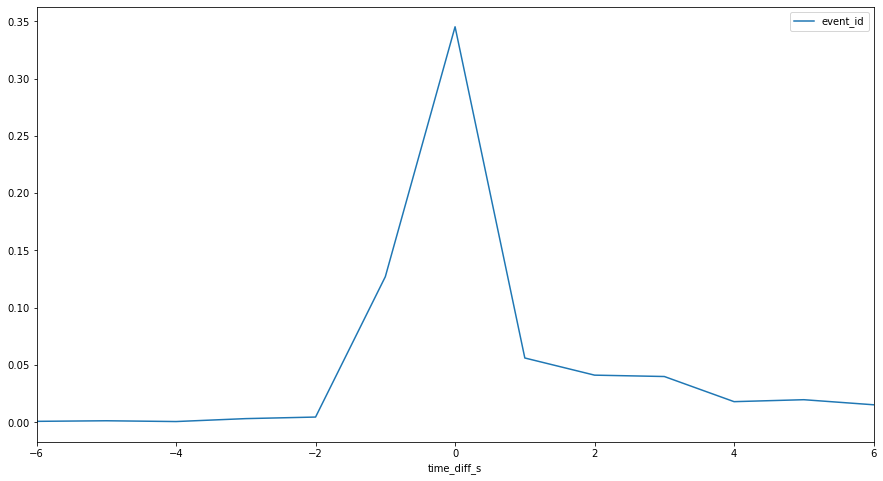

In [12]:
'''
positive = createEvent (tag) happened before ReleaseEvent
'''
ax = (
    df_release_with_create
    .assign(time_diff_s=lambda d: d.time_diff / pd.to_timedelta("1s"))
    .groupby('time_diff_s').count()[['event_id']]
    .assign(event_id=lambda d: d.event_id/d.event_id.sum())
    .plot(figsize=(15,8))
)
ax.set(xlim=(-6,6))

In [13]:
all_events_num = df_release_with_create.groupby('event_id',as_index=False).count().shape[0]
pair_events_num = df_release_with_create[(df_release_with_create['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                                     (df_release_with_create['time_diff'] >= LOWER_TIME_THRESHOLD)].groupby('event_id',as_index=False).count().shape[0]
all_events.append(all_events_num)
pair_events.append(pair_events_num)
print(f'{(pair_events_num/all_events_num)*100}% events are reported as occurring together')

57.42725880551301% events are reported as occurring together


In [14]:
df_release_with_create=df_release_with_create[(df_release_with_create['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                                              (df_release_with_create['time_diff'] >= LOWER_TIME_THRESHOLD)]

list_event_id_covered.extend(df_release_with_create['event_id'].to_list())
list_event_id_covered.extend(df_release_with_create['cr_event_id'].astype('int').to_list())

rel_cr_event_covered = []
rel_cr_event_covered.extend(df_release_with_create['event_id'].to_list())
rel_cr_event_covered.extend(df_release_with_create['cr_event_id'].astype('int').to_list())


df_release_with_create_proc = (
    df_release_with_create
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date',
                     'release_name': 'name',
                     'release_node_id': 'GH_node'})
    [['contributor','repository','date','tag_name','name','description','prerelease','GH_node',
      'release_created_at','cr_tag_description','acc_type']]
    .assign(activity='Publishing a release')
    .assign(new_tag=True)
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(created_at=lambda d: d.release_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(name=lambda d: np.where(d.name.notnull(),d.name,None))
    .assign(rel_description_length=lambda d: np.where(d.description.str.len()>0, d.description.str.len(), 0))
    .assign(rel_description_length=lambda d: d.rel_description_length.astype('int'))
    .assign(tag_description_length=lambda d: np.where(d.cr_tag_description.str.len()>0, d.cr_tag_description.str.len(), 0))
    .assign(tag_description_length=lambda d: d.tag_description_length.astype('int'))
    .assign(type='tag')
)

df_release_with_create_proc['release']=(
    df_release_with_create_proc
    .rename(columns={'rel_description_length':'description_length'})
    [release]
    .to_dict('records')
)
df_release_with_create_proc['gitref']=(
    df_release_with_create_proc
    .rename(columns={'name':'rel_name',
                     'tag_name':'name'})
    [gitref]
    .rename(columns={'tag_description_length':'description_length'})
    .to_dict('records')
)

df_release_with_create_proc=df_release_with_create_proc.sort_values('date')

display(df_release_with_create_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','name','rel_description_length',
                                                              'created_at','prerelease','new_tag','GH_node','type','name',
                                                              'tag_description_length']])

dict_release_with_create_bot=df_release_with_create_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                   'repository','release','gitref']].to_dict('records')

dict_release_with_create_human=df_release_with_create_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                       'repository','release','gitref']].to_dict('records')

,date,activity,contributor,repository,name,rel_description_length,created_at,prerelease,new_tag,GH_node,type,name,tag_description_length
92855,2022-11-25T10:06:39+00:00,Publishing a release,spryker-release-bot,spryker/docker-sdk,1.49.8,240,2022-11-25T10:04:12+00:00,False,True,RE_kwDOC3982c4FBEen,tag,1.49.8,0
103244,2022-11-25T10:21:17+00:00,Publishing a release,cheminfo-bot,cheminfo/baselines,v1.1.4,244,2022-11-25T10:21:01+00:00,False,True,RE_kwDOEWMJhM4FBEzc,tag,v1.1.4,0
103239,2022-11-25T12:39:33+00:00,Publishing a release,cheminfo-bot,cheminfo/nmr-load-save,v0.6.0,517,2022-11-25T12:39:17+00:00,False,True,RE_kwDOFeYblc4FBH9J,tag,v0.6.0,0
138356,2022-11-25T13:05:33+00:00,Publishing a release,vc-ci,VirtoCommerce/vc-module-catalog,3.244.0,173,2022-11-25T12:16:45+00:00,False,True,RE_kwDOA377LM4FBIeO,tag,3.244.0,0
138342,2022-11-25T13:22:32+00:00,Publishing a release,vc-ci,VirtoCommerce/vc-module-google-ecommerce-analy...,4.0.0,75,2022-11-25T13:19:18+00:00,False,True,RE_kwDOA85pEs4FBI39,tag,4.0.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31041,2023-01-25T15:10:43+00:00,Publishing a release,cozy-bot,cozy/cozy-libs,cozy-mespapiers-lib@18.0.3,306,2023-01-25T15:10:40+00:00,False,True,RE_kwDOCC_Zf84FYDFe,tag,cozy-mespapiers-lib@18.0.3,45
18559,2023-01-25T15:26:05+00:00,Publishing a release,getsentry-bot,getsentry/sentry-dart,6.19.0,254,2023-01-25T13:58:35+00:00,False,True,RE_kwDOBeVNvs4FYDnq,tag,6.19.0,0
18553,2023-01-25T15:57:59+00:00,Publishing a release,getsentry-bot,getsentry/sentry-wizard,2.6.0,148,2023-01-25T10:52:40+00:00,False,True,RE_kwDOBo67hc4FYEq0,tag,2.6.0,27
62475,2023-01-25T16:47:31+00:00,Publishing a release,va-bot,department-of-veterans-affairs/gibct-data-service,gibct-data-service/v0.0.98,39,2023-01-23T22:49:04+00:00,False,True,RE_kwDOAx-WQc4FYGVu,tag,gibct-data-service/v0.0.98,0


In [15]:
'''
ReleaseEvent that are made without creating a new tag
'''
df_release_without_create = (
    df_events
    .query('event_type == "ReleaseEvent" and event_id not in @rel_cr_event_covered')
    [['event_id','event_type','login','repository','created_at','description','tag_name','release_name',
      'release_created_at','release_node_id','draft','prerelease','acc_type']]
    .sort_values(['login','repository','created_at'])
)

list_event_id_covered.extend(df_release_without_create['event_id'].to_list())

df_release_without_create_proc = (
    df_release_without_create
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date',
                     'release_name': 'name',
                     'release_node_id': 'GH_node'})
    [['contributor','repository','date','description','tag_name','name','GH_node','draft','prerelease','release_created_at','acc_type']]
    .assign(activity='Publishing a release')
    .assign(new_tag=False)
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(created_at=lambda d: d.release_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(name=lambda d: np.where(d.name.notnull(),d.name,None))
    .assign(rel_description_length=lambda d: np.where(d.description.str.len()>0, d.description.str.len(), 0))
    .assign(rel_description_length=lambda d: d.rel_description_length.astype('int'))
    .assign(tag_description_length=0)
    .assign(type='tag')
)

df_release_without_create_proc['release']=(
    df_release_without_create_proc
    .rename(columns={'rel_description_length':'description_length'})
    [release]
    .to_dict('records')
)
df_release_without_create_proc['gitref']=(
    df_release_without_create_proc
    .rename(columns={'name':'rel_name',
                     'tag_name':'name'})
    [gitref]
    .rename(columns={'tag_description_length':'description_length'})
    .to_dict('records')
)

df_release_without_create_proc=df_release_without_create_proc.sort_values('date')

display(df_release_without_create_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','name','rel_description_length',
                                                              'created_at','prerelease','new_tag','GH_node','type','name',
                                                              'tag_description_length']])

dict_release_without_create_bot=df_release_without_create_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                         'repository','release','gitref']].to_dict('records')

dict_release_without_create_human=df_release_without_create_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                             'repository','release','gitref']].to_dict('records')

,date,activity,contributor,repository,name,rel_description_length,created_at,prerelease,new_tag,GH_node,type,name,tag_description_length
50043,2022-11-25T11:39:56+00:00,Publishing a release,kubevirt-bot,kubevirt/cluster-network-addons-operator,v0.65.9,888,2022-11-25T11:34:48+00:00,False,False,RE_kwDOCm6M2s4FBGxT,tag,v0.65.9,0
145452,2022-11-25T11:50:50+00:00,Publishing a release,webtorrent-bot,webtorrent/create-torrent,v6.0.0,362,2022-11-25T11:50:45+00:00,False,False,RE_kwDOATFmEc4FBG-p,tag,v6.0.0,0
60265,2022-11-25T11:51:28+00:00,Publishing a release,qiwibot,qiwi/paralint,v1.2.0,218,2022-11-25T11:51:27+00:00,False,False,RE_kwDOIeKSb84FBG_f,tag,v1.2.0,0
74875,2022-11-25T11:54:31+00:00,Publishing a release,ballerina-bot,ballerina-platform/ballerina-distribution,2201.3.0-rc3,0,2022-11-25T11:52:33+00:00,True,False,RE_kwDOB57CFM4FBHDO,tag,2201.3.0-rc3,0
60262,2022-11-25T12:32:06+00:00,Publishing a release,qiwibot,qiwi/pijma-v2,2022.11.25-pijma.input.0.1.0-f0,437,2022-11-25T12:32:01+00:00,False,False,RE_kwDODKe6TM4FBHy0,tag,2022.11.25-pijma.input.0.1.0-f0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32137,2023-01-25T14:28:00+00:00,Publishing a release,graalvmbot,graalvm/labs-openjdk-19,None,0,2023-01-05T08:16:21+00:00,False,False,RE_kwDOHmpl9c4FYBp6,tag,None,0
32136,2023-01-25T14:55:12+00:00,Publishing a release,graalvmbot,graalvm/labs-openjdk-17,None,0,2023-01-18T17:17:12+00:00,False,False,RE_kwDOFsJxfc4FYCjG,tag,None,0
68522,2023-01-25T15:00:04+00:00,Publishing a release,release-drafter[bot],appbaseio/reactivesearch,v3.43.7 🌈,337,2023-01-13T12:02:13+00:00,False,False,RE_kwDOBORb884FYB97,tag,v3.43.7 🌈,0
68521,2023-01-25T16:21:13+00:00,Publishing a release,release-drafter[bot],uiowa/uiowa,3.20.1,343,2023-01-25T15:46:59+00:00,False,False,RE_kwDOB9y55M4FVUCe,tag,3.20.1,0


In [16]:
release_event_bot = []
release_event_bot.extend(dict_release_with_create_bot)
release_event_bot.extend(dict_release_without_create_bot)

release_event_human = []
release_event_human.extend(dict_release_with_create_human)
release_event_human.extend(dict_release_without_create_human)
if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/publishing_a_release.json'
    with open(file_name, 'w') as file_object:
        json.dump(release_event_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/publishing_a_release.json'
    with open(file_name, 'w') as file_object:
        json.dump(release_event_human, file_object, indent=4)

#### Creating tag

In [17]:
'''
Filter data based on CreateEvent and ref_type as tag and drop the CreateEvent that are already covered as part of release activity
'''
create_tag = (
    df_events
    .query('event_type == "CreateEvent" and ref_type == "tag" and event_id not in @rel_cr_event_covered')
    [['event_id','event_type','login','repository','created_at','ref','tag_description','acc_type']]
    .assign(activity = 'Creating tag')
    .rename(columns={'login':'contributor',
                     'created_at':'date',
                     'ref':'name'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(type='tag')
    .assign(tag_description_length=lambda d: np.where(d.tag_description.str.len()>0, d.tag_description.str.len(), 0))
)

list_event_id_covered.extend(create_tag['event_id'].to_list())

create_tag['gitref'] = (
    create_tag
    [gitref]
    .rename(columns={'tag_description_length':'description_length'})
    .to_dict('records')
)

create_tag=create_tag.sort_values('date')

display(create_tag.query('acc_type=="bot"')[['date','activity','contributor','repository','type','name','tag_description_length']])

#saving bot events
dict_create_tag_bot=create_tag.query('acc_type=="bot"')[['date','activity','contributor','repository','gitref']].to_dict('records')

#saving human events
dict_create_tag_human=create_tag.query('acc_type=="human"')[['date','activity','contributor','repository','gitref']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/creating_tag.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_create_tag_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/creating_tag.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_create_tag_human, file_object, indent=4)

,date,activity,contributor,repository,type,name,tag_description_length
100479,2022-11-25T09:59:34+00:00,Creating tag,nextcloud-bot,nextcloud/server,tag,v24.0.8rc1,50.0
100478,2022-11-25T09:59:41+00:00,Creating tag,nextcloud-bot,nextcloud/3rdparty,tag,v24.0.8rc1,62.0
100477,2022-11-25T09:59:46+00:00,Creating tag,nextcloud-bot,nextcloud/activity,tag,v24.0.8rc1,32.0
100476,2022-11-25T09:59:57+00:00,Creating tag,nextcloud-bot,nextcloud/circles,tag,v24.0.8rc1,76.0
100475,2022-11-25T10:00:01+00:00,Creating tag,nextcloud-bot,nextcloud/example-files,tag,v24.0.8rc1,38.0
...,...,...,...,...,...,...,...
75911,2023-01-25T15:35:33+00:00,Creating tag,jitsi-jenkins,jitsi/jicofo,tag,jitsi-meet_8247,87.0
75910,2023-01-25T15:35:38+00:00,Creating tag,jitsi-jenkins,jitsi/jitsi-meet,tag,jitsi-meet_8247,125.0
75909,2023-01-25T15:35:44+00:00,Creating tag,jitsi-jenkins,jitsi/lib-jitsi-meet,tag,jitsi-meet_8247,93.0
75908,2023-01-25T15:56:14+00:00,Creating tag,jitsi-jenkins,jitsi/jitsi-meet-torture,tag,jitsi-meet_8247,0.0


#### Deleting tag

In [18]:
'''
Filter data based on DeleteEvent and ref_type as tag
'''
delete_tag = (
    df_events
    .query('event_type == "DeleteEvent" and ref_type == "tag"')
    [['event_id','event_type','login','repository','created_at','ref','acc_type']]
    .assign(activity = 'Deleting tag')
    .rename(columns={'login':'contributor',
                     'created_at':'date',
                     'ref':'name'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(type='tag')
    .assign(tag_description_length=None)
)

list_event_id_covered.extend(delete_tag['event_id'].to_list())

delete_tag['gitref']= (
    delete_tag
    [gitref]
    .rename(columns={'tag_description_length':'description_length'})
    .to_dict('records')
)

delete_tag=delete_tag.sort_values('date')

display(delete_tag.query('acc_type=="bot"')[['date','activity','contributor','repository','type','name','tag_description_length']])

#saving bot events
dict_delete_tag_bot=delete_tag.query('acc_type=="bot"')[['date','activity','contributor','repository','gitref']].to_dict('records')

#saving human events
dict_delete_tag_human=delete_tag.query('acc_type=="human"')[['date','activity','contributor','repository','gitref']].to_dict('records')
# print(dict_created_repository_bot)

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/deleting_tag.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_delete_tag_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/deleting_tag.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_delete_tag_human, file_object, indent=4)

,date,activity,contributor,repository,type,name,tag_description_length
109413,2022-11-26T02:35:50+00:00,Deleting tag,openhab-bot,openhab-sandbox/openhab-core,tag,3.4.0,None
76945,2022-11-26T03:23:04+00:00,Deleting tag,cmsdmwmbot,dmwm/WMCore,tag,JENKINS_20221125152154,None
76946,2022-11-26T03:23:04+00:00,Deleting tag,cmsdmwmbot,dmwm/WMCore,tag,JENKINS_20221125042259,None
109409,2022-11-26T03:26:33+00:00,Deleting tag,openhab-bot,openhab-sandbox/openhab-addons,tag,3.4.0,None
42852,2022-11-26T05:05:59+00:00,Deleting tag,google-oss-bot,firebase/firebase-ios-sdk,tag,CocoaPods-10.3.0.nightly,None
...,...,...,...,...,...,...,...
56948,2023-01-25T07:21:08+00:00,Deleting tag,openhab-bot,openhab-sandbox/openhab-addons,tag,3.4.2,None
56951,2023-01-25T11:21:33+00:00,Deleting tag,openhab-bot,openhab-sandbox/org.openhab.binding.zwave,tag,3.4.2,None
56947,2023-01-25T11:24:46+00:00,Deleting tag,openhab-bot,openhab-sandbox/org.openhab.binding.zigbee,tag,3.4.2,None
56942,2023-01-25T11:34:46+00:00,Deleting tag,openhab-bot,openhab-sandbox/openhab-webui,tag,3.4.2,None


#### Deleting branch

In [19]:
'''
Filter data based on DeleteEvent and ref_type as branch
'''
delete_branch = (
    df_events
    .query('event_type == "DeleteEvent" and ref_type == "branch"')
    [['event_id','event_type','login','repository','created_at','ref','acc_type']]
    .assign(activity = 'Deleting branch')
    .rename(columns={'login':'contributor',
                     'created_at':'date',
                     'ref':'name'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(type='branch')
    .assign(tag_description_length=None)
)

list_event_id_covered.extend(delete_branch['event_id'].to_list())
delete_branch['gitref']= (
    delete_branch
    [gitref]
    .rename(columns={'tag_description_length':'description_length'})
    .to_dict('records')
)
delete_branch=delete_branch.sort_values('date')

display(delete_branch.query('acc_type=="bot"')[['date','activity','contributor','repository','type','name','tag_description_length']])

#saving bot events
dict_delete_branch_bot=delete_branch.query('acc_type=="bot"')[['date','activity','contributor','repository','gitref']].to_dict('records')

#saving human events
dict_delete_branch_human=delete_branch.query('acc_type=="human"')[['date','activity','contributor','repository','gitref']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/deleting_branch.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_delete_branch_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/deleting_branch.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_delete_branch_human, file_object, indent=4)

,date,activity,contributor,repository,type,name,tag_description_length
101075,2022-11-25T09:57:09+00:00,Deleting branch,delete-merged-branch[bot],owncloud/client,branch,logParseables,None
101074,2022-11-25T09:57:21+00:00,Deleting branch,delete-merged-branch[bot],nextcloud/android-library,branch,dependabot/gradle/com.diffplug.spotless-6.12.0,None
101073,2022-11-25T09:58:00+00:00,Deleting branch,delete-merged-branch[bot],AlexanderPrendota/kotlin-compiler-server,branch,renovate/spring-boot,None
55455,2022-11-25T10:00:08+00:00,Deleting branch,skia-flutter-autoroll,skia-flutter-autoroll/engine,branch,skia-flutter-autoroll-523eed01-41cd-43c4-97b2-...,None
68734,2022-11-25T10:00:56+00:00,Deleting branch,wso2-jenkins-bot,wso2/carbon-identity-framework,branch,release-5.25.44-v489,None
...,...,...,...,...,...,...,...
65830,2023-01-25T17:01:15+00:00,Deleting branch,delete-merged-branch[bot],deepchecks/deepchecks,branch,Vision_renewed,None
65829,2023-01-25T17:01:43+00:00,Deleting branch,delete-merged-branch[bot],nextcloud/android,branch,bumps-after-3.24,None
65828,2023-01-25T17:02:18+00:00,Deleting branch,delete-merged-branch[bot],signalfx/splunk-otel-collector,branch,dependabot/go_modules/tests/k8s.io/kubectl-0.26.1,None
60251,2023-01-25T17:03:14+00:00,Deleting branch,r-ryantm,r-ryantm/nixpkgs,branch,auto-update/ipxe,None


#### Making repository public

In [20]:
'''
Filter data based on PublicEvent
'''
public_event = (
    df_events
    .query('event_type == "PublicEvent"')
    [['event_id','event_type','login','repository','created_at','acc_type']]
    .assign(activity = 'Making repository public')
    .rename(columns={'login':'contributor', 'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
)

list_event_id_covered.extend(public_event['event_id'].to_list())
public_event=public_event.sort_values('date')

display(public_event.query('acc_type=="bot"')[['date','activity','contributor','repository']].head(10)) # there are no public events made by bots

#saving bot events
dict_public_event_bot=public_event.query('acc_type=="bot"')[['date','activity','contributor','repository']].to_dict('records')
for event in dict_public_event_bot:
    event['payload'] = {}

#saving human events
dict_public_event_human=public_event.query('acc_type=="human"')[['date','activity','contributor','repository']].to_dict('records')
for event in dict_public_event_human:
    event['payload'] = {}

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/public_event.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_public_event_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/public_event.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_public_event_human, file_object, indent=4)

,date,activity,contributor,repository
3402,2023-01-25T05:52:47+00:00,Making repository public,matzkoh,matzkoh/renovate-config


#### Adding collaborator to repository

In [21]:
'''
Filter data based on MemberEvent
'''
member_event = (
    df_events
    .query('event_type == "MemberEvent"')
    [['event_id','event_type','login','repository','created_at','acc_type']]
    .assign(activity = 'Adding collaborator to repository')
    .rename(columns={'login':'contributor', 'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
)

list_event_id_covered.extend(member_event['event_id'].to_list())
member_event=member_event.sort_values('date')

display(member_event.query('acc_type=="bot"')[['date','activity','contributor','repository']].head(10))

#saving bot events
dict_member_event_bot=member_event.query('acc_type=="bot"')[['date','activity','contributor','repository']].to_dict('records')
for event in dict_member_event_bot:
    event['payload'] = {}
    
#saving human events
dict_member_event_human=member_event.query('acc_type=="human"')[['date','activity','contributor','repository']].to_dict('records')
for event in dict_member_event_human:
    event['payload'] = {}

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/member_event.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_member_event_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/member_event.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_member_event_human, file_object, indent=4)

,date,activity,contributor,repository
86854,2022-11-26T04:10:36+00:00,Adding collaborator to repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-and-remov...
86734,2022-11-27T04:10:34+00:00,Adding collaborator to repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-and-remov...
11295,2022-12-02T09:41:08+00:00,Adding collaborator to repository,openshift-ci-robot,openshift/ci-ns-ttl-controller
11294,2022-12-02T09:42:12+00:00,Adding collaborator to repository,openshift-ci-robot,openshift/release
86795,2022-12-12T04:10:42+00:00,Adding collaborator to repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-and-remov...
87089,2022-12-13T04:10:34+00:00,Adding collaborator to repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-and-remov...
87168,2022-12-14T04:10:39+00:00,Adding collaborator to repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-and-remov...
128587,2022-12-15T03:14:43+00:00,Adding collaborator to repository,ucloud-bot,ucloud-bot/ucloud-sdk-java
86213,2022-12-15T04:10:34+00:00,Adding collaborator to repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-and-remov...
86435,2022-12-16T04:10:36+00:00,Adding collaborator to repository,octokit-fixture-user-a,octokit-fixture-org/tmp-scenario-add-and-remov...


#### Forking a repository

In [22]:
'''
Filter data based on ForkEvent
'''
forking_repository = (
    df_events
    .query('event_type == "ForkEvent"')
    [['event_id','event_type','login','repository','created_at','acc_type']]
    .assign(activity = 'Forking repository')
    .rename(columns={'login':'contributor', 'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
)

list_event_id_covered.extend(forking_repository['event_id'].to_list())
forking_repository=forking_repository.sort_values('date')

display(forking_repository.query('acc_type=="bot"')[['date','activity','contributor','repository']])

#saving bot events
dict_forking_repository_bot=forking_repository.query('acc_type=="bot"')[['date','activity','contributor','repository']].to_dict('records')
for event in dict_forking_repository_bot:
    event['payload'] = {}

#saving human events
dict_forking_repository_human=forking_repository.query('acc_type=="human"')[['date','activity','contributor','repository']].to_dict('records')
for event in dict_forking_repository_human:
    event['payload'] = {}

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/forking_repository.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_forking_repository_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/forking_repository.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_forking_repository_human, file_object, indent=4)

,date,activity,contributor,repository
53279,2022-11-25T10:47:08+00:00,Forking repository,openshift-cherrypick-robot,openshift/alibaba-cloud-csi-driver
95559,2022-11-25T10:49:42+00:00,Forking repository,fossabot,ROC-L/tset_ruoyi_nopom
95560,2022-11-25T10:49:42+00:00,Forking repository,fossabot,ROC-L/test_ruoyi_pom
53272,2022-11-25T13:17:20+00:00,Forking repository,openshift-cherrypick-robot,openshift-knative/kn-plugin-func
144217,2022-11-25T17:44:01+00:00,Forking repository,regro-cf-autotick-bot,conda-forge/lightning-utilities-feedstock
...,...,...,...,...
50567,2023-01-25T06:20:40+00:00,Forking repository,fossabot,Lisk809/anemo
75338,2023-01-25T09:55:00+00:00,Forking repository,gitter-badger,pimgeek/chat
75355,2023-01-25T14:47:35+00:00,Forking repository,gitter-badger,YPares/arpligner
50514,2023-01-25T16:18:41+00:00,Forking repository,fossabot,Pupbotjs/doc


#### Starring a repository

In [23]:
'''
Filter data based on WatchEvent. This can correspond to watching a repository and also starring it.
'''
starring_repository = (
    df_events
    .query('event_type == "WatchEvent"')
    [['event_id','event_type','login','repository','created_at','acc_type']]
    .assign(activity = 'Starring repository')
    .rename(columns={'login':'contributor', 'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
)

list_event_id_covered.extend(starring_repository['event_id'].to_list())
starring_repository=starring_repository.sort_values('date')

display(starring_repository.query('acc_type=="bot"')[['date','activity','contributor','repository']])

#saving bot events
dict_starring_repository_bot=starring_repository.query('acc_type=="bot"')[['date','activity','contributor','repository']].to_dict('records')
for event in dict_starring_repository_bot:
    event['payload'] = {}

#saving human events
dict_starring_repository_human=starring_repository.query('acc_type=="human"')[['date','activity','contributor','repository']].to_dict('records')
for event in dict_starring_repository_human:
    event['payload'] = {}

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/starring_repository.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_starring_repository_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/starring_repository.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_starring_repository_human, file_object, indent=4)

,date,activity,contributor,repository
71990,2022-11-25T14:03:18+00:00,Starring repository,rultor,objectionary/news.eolang.org
82809,2022-11-26T11:00:30+00:00,Starring repository,Richienb,johnthagen/min-sized-rust
57687,2022-11-28T04:28:26+00:00,Starring repository,palashmon,payloadcms/remix-server
71769,2022-11-29T06:28:13+00:00,Starring repository,rultor,yegor256/qpdf-action
72232,2022-11-30T08:28:34+00:00,Starring repository,rultor,yegor256/latexmk-action
...,...,...,...,...
4859,2023-01-23T09:12:47+00:00,Starring repository,rultor,h1alexbel/dothem
60149,2023-01-24T18:25:48+00:00,Starring repository,Richienb,TreB1eN/InsightFace_Pytorch
59897,2023-01-25T00:33:52+00:00,Starring repository,Richienb,Hangz-nju-cuhk/Rotate-and-Render
4916,2023-01-25T08:32:05+00:00,Starring repository,rultor,objectionary/geo


#### Editing a wiki page

In [24]:
'''
Filter events based on GollumEvent
'''
df_wiki_page = (
    df_events
    .query('event_type == "GollumEvent"')
    [['event_id','event_type','login','repository','created_at','action','page_name','page_title','acc_type']]
    .rename(columns={'login':'contributor', 
                     'created_at':'date',
                     'page_name':'name',
                     'page_title':'title'})
    .assign(activity = 'Editing wiki page')
    .assign(new=lambda d: np.where(d.action=="created", True, False))
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
)

list_event_id_covered.extend(df_wiki_page['event_id'].to_list())

df_wiki_page['page']=df_wiki_page[['name','title','new']].to_dict('records')
df_wiki_page=df_wiki_page.sort_values('date')

display(df_wiki_page.query('acc_type=="bot"')[['date','activity','contributor','repository','page']].head(10))

#saving bot events
dict_wiki_page_bot=df_wiki_page.query('acc_type=="bot"')[['date','activity','contributor','repository','page']].to_dict('records')

#saving human events
dict_wiki_page_human=df_wiki_page.query('acc_type=="human"')[['date','activity','contributor','repository','page']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/editing_wiki_page.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_wiki_page_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/editing_wiki_page.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_wiki_page_human, file_object, indent=4)

,date,activity,contributor,repository,page
138172,2022-11-26T00:15:22+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."
137698,2022-11-27T00:17:40+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."
138119,2022-11-28T00:13:38+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."
137950,2022-11-29T00:14:29+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."
138426,2022-11-30T00:17:22+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."
138491,2022-12-01T00:18:09+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."
52457,2022-12-01T20:49:34+00:00,Editing wiki page,spring-builds,spring-cloud/spring-cloud-release,"{'name': 'Spring-Cloud-2022.0-Release-Notes', ..."
138335,2022-12-02T00:13:39+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."
138596,2022-12-03T00:14:18+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."
138726,2022-12-04T00:17:49+00:00,Editing wiki page,vc-ci,VirtoCommerce/vc-github-actions,"{'name': 'Workflow-status', 'title': 'Workflow..."


#### Transferring an issue

In [25]:
'''
Issue is tranferred if
1. action is "opened" with some timestamp in issue_closed_at field - Issue transferred after it is closed
2. action is "opened" without any timestamp in issue_closed_at, but number of comments > 0 - Issue is transferred while it is open
'''

df_transferring_issue = df_events[(df_events['event_type']=="IssuesEvent") & 
                               (df_events['action']=="opened") & 
                               ((df_events['num_comments']>0) | (df_events['issue_closed_at'].notnull()))]
df_transferring_issue = (
    df_transferring_issue
    [['event_id','event_type','login','repository','created_at','issue_number','issue_created_at','issue_closed_at','title',
      'num_comments','body','issue_node_id','close_reason','acc_type']]
    .rename(columns={'login':'contributor', 'created_at':'date'})
    .assign(activity = 'Transferring issue')
    .assign(status = lambda d: np.where(d.issue_closed_at.notnull(), "closed", "open"))
    .assign(created_at = lambda d: d.issue_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at = lambda d: np.where(d.issue_closed_at.notnull(), d.issue_closed_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat())
                                           , None))
    .assign(comments = lambda d: (d.num_comments + 1).astype('int'))
    .assign(id = lambda d: d.issue_number.astype('int'))
    .assign(length = lambda d: np.where(d.body.str.len()>0, d.body.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(resolved=lambda d: np.where(d.close_reason == "completed", True, False))
    .assign(GH_node=lambda d: d.issue_node_id)
)
list_event_id_covered.extend(df_transferring_issue['event_id'].to_list())
transferring_issue = []
transferring_issue.extend(df_transferring_issue['event_id'].to_list())

df_transferring_issue['issue'] = df_transferring_issue[issue_field].to_dict('records')
df_transferring_issue['conversation'] = df_transferring_issue[['comments']].to_dict('records')
df_transferring_issue['comment'] = df_transferring_issue[['length','GH_node']].to_dict('records')
df_transferring_issue = df_transferring_issue.sort_values('date')

display(df_transferring_issue[['date','activity','contributor','repository','issue_number','num_comments','issue_created_at',
                               'issue_closed_at','title','num_comments','body','issue_node_id','close_reason','acc_type']].query('acc_type=="bot"').head(5))

#saving bot events
dict_transfering_open_issue_bot=df_transferring_issue.query('acc_type=="bot"')[['date','activity','contributor','repository',
                                                                                'comment','issue','conversation']].to_dict('records')

#saving human events
dict_transfering_open_issue_human=df_transferring_issue.query('acc_type=="human"')[['date','activity','contributor','repository',
                                                                                    'comment','issue','conversation']].to_dict('records')
if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/transferring_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_transfering_open_issue_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/transferring_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_transfering_open_issue_human, file_object, indent=4)

,date,activity,contributor,repository,issue_number,num_comments,issue_created_at,issue_closed_at,title,num_comments,body,issue_node_id,close_reason,acc_type
66005,2022-11-27T21:54:02+00:00,Transferring issue,typescript-bot,microsoft/TypeScript,51657,1,2022-11-27 21:54:01,NaT,[ServerErrors][TypeScript] 5.0.0-dev.20221127,1,The following errors were reported by 5.0.0-de...,I_kwDOAT9aAc5XWxlc,NaN,bot
123594,2022-12-02T17:42:39+00:00,Transferring issue,matrixbot,vector-im/element-meta,853,2,2016-01-13 12:51:29,NaT,Room aliases should not be case sensitive,2,NaN,MDU6SXNzdWUxNDczMjE2NDA4,NaN,bot
132593,2022-12-14T14:53:32+00:00,Transferring issue,sentry-io[bot],getsentry/sentry-javascript,6534,2,2022-11-28 20:35:50,NaT,TypeError: Cannot read properties of undefined...,2,NaN,I_kwDOADLKPM5ZN31b,NaN,bot
76234,2022-12-16T18:15:50+00:00,Transferring issue,swift-ci,apple/swift-package-manager,5979,5,2017-12-11 06:19:58,NaT,[SR-6568] Add option in Swift driver to force ...,5,\n | | |\n ...,MDU6SXNzdWUxNTAwNjYzMDQw,NaN,bot
130049,2023-01-13T00:18:38+00:00,Transferring issue,sentry-io[bot],freelawproject/juriscraper,621,2,2023-01-12 21:32:17,NaT,Selenium Connection Issues: SessionNotCreatedE...,2,NaN,I_kwDOAVtA1c5bSS2j,NaN,bot


#### Opening issue

In [26]:
'''
If an issue with action opened is not covered in transferred issue then it is new
'''
df_opening_issue = (
    df_events
    .query('event_type == "IssuesEvent" and action == "opened" and event_id not in @transferring_issue')
    [['event_id','event_type','login','repository','created_at','action','issue_number','issue_created_at','num_comments',
      'title','body','close_reason','state','issue_node_id','acc_type']]
    .rename(columns={'login':'contributor', 'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(activity='Opening issue')
    .assign(status=lambda d: d.state)
    .assign(created_at=lambda d: d.issue_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(id=lambda d: d.issue_number.astype('int'))
    .assign(length=lambda d: np.where(d.body.str.len()>0, d.body.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
    .assign(resolved=lambda d: np.where(d.close_reason == "completed", True, False))
    .assign(GH_node=lambda d: d.issue_node_id)
    .assign(closed_at=None)
)

list_event_id_covered.extend(df_opening_issue['event_id'].to_list())

df_opening_issue['issue'] = df_opening_issue[issue_field].to_dict('records')
df_opening_issue['conversation'] = df_opening_issue[['comments']].to_dict('records')
df_opening_issue['comment'] = df_opening_issue[['length','GH_node']].to_dict('records')
df_opening_issue = df_opening_issue.sort_values('date')

display(df_opening_issue.query('acc_type=="bot"')[['date','activity','contributor','repository','length','GH_node','id','title','created_at',
                                                   'status','closed_at','resolved','comments']])

#saving bot events
dict_opening_issue_bot=df_opening_issue.query('acc_type=="bot"')[['date','activity','contributor','repository',
                                                                  'comment','issue','conversation']].to_dict('records')

#saving human events
dict_opening_issue_human=df_opening_issue.query('acc_type=="human"')[['date','activity','contributor','repository',
                                                                      'comment','issue','conversation']].to_dict('records')
if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/opening_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_opening_issue_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/opening_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_opening_issue_human, file_object, indent=4)

,date,activity,contributor,repository,length,GH_node,id,title,created_at,status,closed_at,resolved,comments
132447,2022-11-25T11:49:52+00:00,Opening issue,sentry-io[bot],29ki/29k,299,I_kwDOHh_ueM5XSY1o,1095,Invariant Violation: scrollToIndex out of rang...,2022-11-25T11:49:51+00:00,open,None,False,1
82538,2022-11-25T12:30:03+00:00,Opening issue,Richienb,eladrich/pixel2style2pixel,374,I_kwDOEeVpS85XSj91,299,Why are the coarse details determined from the...,2022-11-25T12:30:03+00:00,open,None,False,1
56486,2022-11-25T18:12:48+00:00,Opening issue,usercont-release-bot,packit/weekly-roles,3601,I_kwDOH8iGos5XT2jx,96,Service Guru,2022-11-25T18:12:48+00:00,open,None,False,1
56485,2022-11-25T18:12:50+00:00,Opening issue,usercont-release-bot,packit/weekly-roles,1019,I_kwDOH8iGos5XT2kA,97,Chief of Monitors,2022-11-25T18:12:49+00:00,open,None,False,1
56484,2022-11-25T18:12:51+00:00,Opening issue,usercont-release-bot,packit/weekly-roles,1817,I_kwDOH8iGos5XT2kL,98,Kanban Lead,2022-11-25T18:12:50+00:00,open,None,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2023-01-25T16:36:57+00:00,Opening issue,gopherbot,golang/go,397,I_kwDOAWBuf85czS4O,57994,os: TestCloseWithBlockingReadByFd failures,2023-01-25T16:36:57+00:00,open,None,False,1
3253,2023-01-25T16:37:00+00:00,Opening issue,gopherbot,golang/go,288,I_kwDOAWBuf85czS5D,57995,Testing packages.: unrecognized failures,2023-01-25T16:36:59+00:00,open,None,False,1
3252,2023-01-25T16:37:02+00:00,Opening issue,gopherbot,golang/go,529,I_kwDOAWBuf85czS5o,57996,net/http: TestInterruptWithPanic failures,2023-01-25T16:37:01+00:00,open,None,False,1
35812,2023-01-25T17:00:34+00:00,Opening issue,sentry-io[bot],PythonCoderAS/wikidata-anime-import,502,I_kwDOIRvo1c5czayO,7,HTTPError: 404 Client Error: Not Found for url...,2023-01-25T17:00:34+00:00,open,None,False,1


#### Closing Issue

In [27]:
'''
We have 2 dfs - df_closing_issue_before_comment and df_closing_issue_after_comment
Commenting under pull request is also reported under IssueCommentEvent, so we need to remove the events corresponding to commeting under pull requests.

Then we replace the values with NaN wherever login, repo and issue_number are different between IssuesEvent and IssueCommentEvent, and merge both the df's
'''

df_closing_issue_or_PR_comment = (
    df_events
    .query('(event_type == "IssuesEvent" and action == "closed") or event_type == "IssueCommentEvent"')
    .drop_duplicates()
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_closed_at','issue_number','title','body',
      'num_comments','comment','close_reason','state','issue_node_id','comment_node_id','acc_type']]
    .sort_values(['login','repository','created_at'])
)

df_closing_issue_and_comment_1 = df_closing_issue_or_PR_comment[df_closing_issue_or_PR_comment['issue_number'].notnull()]

df_closing_issue_before_comment = (
    df_closing_issue_and_comment_1
    .assign(next_event_id=lambda d: d.event_id.shift(-1))
    .assign(next_event=lambda d: d.event_type.shift(-1))
    .assign(next_login=lambda d: d.login.shift(-1))
    .assign(next_repository=lambda d: d.repository.shift(-1))
    .assign(next_issue_number=lambda d: d.issue_number.shift(-1))
    .assign(next_issue_title=lambda d: d.title.shift(-1))
    .assign(next_issue_state=lambda d: d.state.shift(-1))
    .assign(next_close_reason=lambda d: d.close_reason.shift(-1))
    .assign(next_comment=lambda d: d.comment.shift(-1))
    .assign(next_event_created_at=lambda d: d.created_at.shift(-1))
    .assign(next_event_issue_created_at=lambda d: d.issue_created_at.shift(-1))
    .assign(next_event_num_comment=lambda d: d.num_comments.shift(-1))
    .assign(next_event_node_id=lambda d: d.comment_node_id.shift(-1))
    .assign(comm_event_type=lambda d: 
            np.where(((d.event_type == "IssuesEvent") & (d.next_event == "IssueCommentEvent") & 
                      (d.login == d.next_login) & (d.repository == d.next_repository) &
                      (d.issue_number == d.next_issue_number) & (d.state == d.next_issue_state)), 
                     d.next_event, np.nan))
    .query('event_type == "IssuesEvent" and comm_event_type == "IssueCommentEvent"')
    .rename(columns={'next_event_created_at':'comm_created_at', 'next_issue_state':'comm_issue_state', 
                     'next_issue_number':'comm_issue_number', 'next_repository':'comm_repository', 
                     'next_login':'comm_login', 'next_event_id':'comm_event_id', 
                     'next_event_num_comment':'comm_num_comment', 'next_comment':'comm_comment', 
                     'next_close_reason':'comm_close_reason', 'next_event_issue_created_at':'comm_issue_created_at',
                     'next_issue_title': 'comm_issue_title', 'next_event_node_id': 'comm_comment_node_id'})
    .assign(time_diff=lambda d: d.created_at - d.comm_created_at)
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_closed_at','issue_number','num_comments',
      'title','body','comment','close_reason','state','issue_node_id',
      'comm_event_id','comm_event_type','comm_login','comm_repository','comm_created_at','comm_issue_created_at','comm_issue_number',
      'comm_issue_title','comm_num_comment','comm_comment','comm_close_reason','comm_issue_state','comm_comment_node_id','time_diff','acc_type']]
)

df_closing_issue_after_comment = (
    df_closing_issue_and_comment_1
    .assign(prev_event_id=lambda d: d.event_id.shift(1))
    .assign(prev_event=lambda d: d.event_type.shift(1))
    .assign(prev_login=lambda d: d.login.shift(1))
    .assign(prev_repository=lambda d: d.repository.shift(1))
    .assign(prev_issue_number=lambda d: d.issue_number.shift(1))
    .assign(prev_issue_title=lambda d: d.title.shift(1))
    .assign(prev_issue_state=lambda d: d.state.shift(1))
    .assign(prev_close_reason=lambda d: d.close_reason.shift(1))
    .assign(prev_comment=lambda d: d.comment.shift(1))
    .assign(prev_event_created_at=lambda d: d.created_at.shift(1))
    .assign(prev_event_issue_created_at=lambda d: d.issue_created_at.shift(1))
    .assign(prev_event_num_comment=lambda d: d.num_comments.shift(1))
    .assign(prev_event_node_id=lambda d: d.comment_node_id.shift(1))
    .assign(comm_event_type=lambda d:
            np.where(((d.event_type == "IssuesEvent") & (d.prev_event == "IssueCommentEvent") & 
                      (d.login == d.prev_login) & (d.repository == d.prev_repository) &
                      (d.issue_number == d.prev_issue_number) & (d.state == d.prev_issue_state)), 
                     d.prev_event, np.nan))
    .query('event_type == "IssuesEvent" and comm_event_type == "IssueCommentEvent"')
    .rename(columns={'prev_event_created_at':'comm_created_at', 'prev_issue_state':'comm_issue_state', 
                     'prev_issue_number':'comm_issue_number', 'prev_repository':'comm_repository', 
                     'prev_login':'comm_login', 'prev_event_id':'comm_event_id', 
                     'prev_event_num_comment':'comm_num_comment', 'prev_comment':'comm_comment', 
                     'prev_close_reason':'comm_close_reason', 'prev_event_issue_created_at':'comm_issue_created_at',
                     'prev_issue_title': 'comm_issue_title', 'prev_event_node_id': 'comm_comment_node_id'})
    .assign(time_diff=lambda d: d.created_at - d.comm_created_at)
    
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_closed_at','issue_number','num_comments',
      'title','body','comment','close_reason','state','issue_node_id',
      'comm_event_id','comm_event_type','comm_login','comm_repository','comm_created_at','comm_issue_created_at','comm_issue_number',
      'comm_issue_title','comm_num_comment','comm_comment','comm_close_reason','comm_issue_state','comm_comment_node_id','time_diff','acc_type']]
)

df_closing_issue_with_comment = pd.concat([df_closing_issue_before_comment, df_closing_issue_after_comment])

[(-6.0, 6.0)]

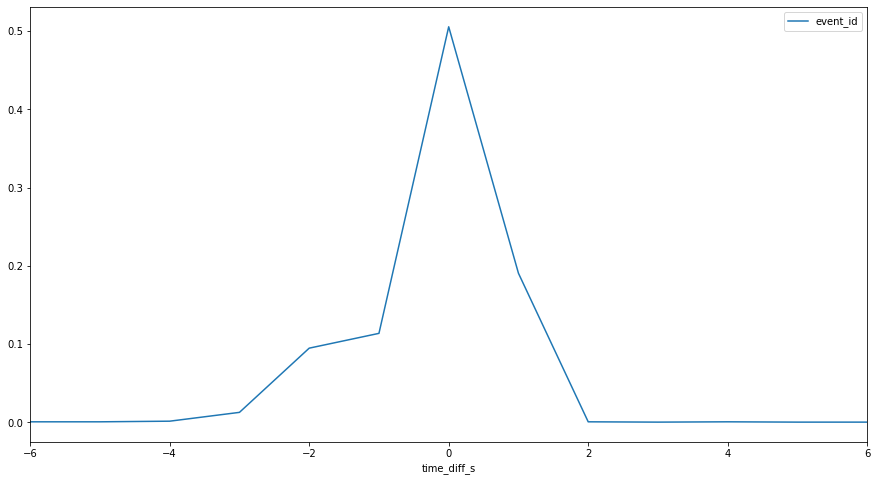

In [28]:
'''
positive = IssueCommentEvent happened before IssueEvent - close
'''
ax = (
    df_closing_issue_with_comment
    .assign(time_diff_s=lambda d: d.time_diff / pd.to_timedelta("1s"))
    .groupby('time_diff_s').count()[['event_id']]
    .assign(event_id=lambda d: d.event_id/d.event_id.sum())
    .plot(figsize=(15,8))
)
ax.set(xlim=(-6,6))

In [29]:
all_events_num = df_closing_issue_with_comment.groupby('event_id',as_index=False).count().shape[0]
pair_events_num = (
    df_closing_issue_with_comment[(df_closing_issue_with_comment['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                                  (df_closing_issue_with_comment['time_diff'] >= LOWER_TIME_THRESHOLD)]
    .groupby('event_id',as_index=False)
    .count()
    .shape[0]
)
all_events.append(all_events_num)
pair_events.append(pair_events_num)
print(f'{(pair_events_num/all_events_num)*100}% events are occurring together')

91.58194387962585% events are occurring together


In [30]:
df_closing_issue_with_comment=df_closing_issue_with_comment[(df_closing_issue_with_comment['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                                                                (df_closing_issue_with_comment['time_diff'] >= LOWER_TIME_THRESHOLD)]

list_event_id_covered.extend(df_closing_issue_with_comment['event_id'].to_list())
list_event_id_covered.extend(df_closing_issue_with_comment['comm_event_id'].astype('int').to_list())

issue_comm_event_covered = []
issue_comm_event_covered.extend(df_closing_issue_with_comment['event_id'].to_list())
issue_comm_event_covered.extend(df_closing_issue_with_comment['comm_event_id'].astype('int').to_list())

df_closing_issue_with_comment_proc = (
    df_closing_issue_with_comment
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(status="closed")
    .assign(created_at=lambda d: d.issue_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: d.issue_closed_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(activity='Closing issue')
    .assign(id=lambda d: d.issue_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(length=lambda d: np.where(d.comm_comment.str.len()>0, d.comm_comment.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
    .assign(resolved=lambda d: np.where(d.close_reason == "completed", True, False))
    [['date','contributor','activity','repository','comments','id','title','status','length','resolved',
      'issue_node_id','comm_comment_node_id','created_at','closed_at','acc_type']]
)

df_closing_issue_with_comment_proc['issue'] = (
    df_closing_issue_with_comment_proc
    .rename(columns={'issue_node_id':'GH_node'})
    [issue_field]
    .to_dict('records')
)
df_closing_issue_with_comment_proc['conversation']=df_closing_issue_with_comment_proc[['comments']].to_dict('records')
df_closing_issue_with_comment_proc['comment'] = (
    df_closing_issue_with_comment_proc
    .rename(columns={'comm_comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_closing_issue_with_comment_proc=df_closing_issue_with_comment_proc.sort_values('date')

display(df_closing_issue_with_comment_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comm_comment_node_id',
                                                                     'id','title','created_at','status','closed_at','resolved','issue_node_id','comments']])

dict_closing_issue_with_comment_bot=df_closing_issue_with_comment_proc.query('acc_type=="bot"')[['date','activity','contributor','repository',
                                                                                                 'comment','issue','conversation']].to_dict('records')
dict_closing_issue_with_comment_human=df_closing_issue_with_comment_proc.query('acc_type=="human"')[['date','activity','contributor','repository',
                                                                                                     'comment','issue','conversation']].to_dict('records')

,date,activity,contributor,repository,length,comm_comment_node_id,id,title,created_at,status,closed_at,resolved,issue_node_id,comments
116155,2022-11-25T10:42:38+00:00,Closing issue,google-ml-butler[bot],google/mediapipe,455,IC_kwDOC27xRM5PHTCG,3843,error building handtracking gpu example with b...,2022-11-10T13:07:23+00:00,closed,2022-11-25T10:42:37+00:00,True,I_kwDOC27xRM5WD9mq,4
69005,2022-11-25T10:49:26+00:00,Closing issue,echarts-bot[bot],apache/echarts,646,IC_kwDOAIwqAM5PHUfL,17977,[Bug],2022-11-25T10:49:23+00:00,closed,2022-11-25T10:49:25+00:00,False,I_kwDOAIwqAM5XSGrz,1
50046,2022-11-25T11:37:16+00:00,Closing issue,kubevirt-bot,kubevirt/kubevirt,652,IC_kwDOBJIk985PHgaH,7940,unit test flake: there are no expected calls o...,2022-06-19T06:36:09+00:00,closed,2022-11-25T11:37:16+00:00,True,I_kwDOBJIk985MDbtf,5
50024,2022-11-25T12:38:36+00:00,Closing issue,kubevirt-bot,kubevirt/cluster-network-addons-operator,675,IC_kwDOCm6M2s5PHuMO,1388,[main] Flaky on ovs-cni lane,2022-06-28T11:17:07+00:00,closed,2022-11-25T12:38:36+00:00,True,I_kwDOCm6M2s5MuOyz,5
150818,2022-11-25T20:32:40+00:00,Closing issue,jetstack-bot,cert-manager/cert-manager,717,IC_kwDOBYCWqs5PJbF_,5146,New certificate is not issued when duration is...,2022-05-23T05:37:59+00:00,closed,2022-11-25T20:32:40+00:00,True,I_kwDOBYCWqs5KLzZE,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75651,2023-01-25T06:53:26+00:00,Closing issue,google-ml-butler[bot],google/mediapipe,455,IC_kwDOC27xRM5TorSM,3967,Not able to build docker image for autoflip on...,2023-01-04T11:23:20+00:00,closed,2023-01-25T06:53:25+00:00,True,I_kwDOC27xRM5ahxBs,7
75644,2023-01-25T08:33:29+00:00,Closing issue,google-ml-butler[bot],tensorflow/tensorflow,467,IC_kwDOArmXAs5TpADW,59188,Crash when running gen_nn_ops.fused_batch_norm...,2023-01-09T15:47:21+00:00,closed,2023-01-25T08:33:28+00:00,True,I_kwDOArmXAs5a8p3R,4
9218,2023-01-25T11:27:02+00:00,Closing issue,jetstack-bot,cert-manager/cert-manager,717,IC_kwDOBYCWqs5Tpypx,5406,url property in index.yaml at charts.jetstack....,2022-08-26T14:33:41+00:00,closed,2023-01-25T11:27:01+00:00,True,I_kwDOBYCWqs5Qm0V4,5
51113,2023-01-25T12:39:45+00:00,Closing issue,jacogr,polkadot-js/apps,8,IC_kwDOB6xRes5TqGsI,8878,Unavailable chain endpoints,2023-01-24T13:20:05+00:00,closed,2023-01-25T12:39:44+00:00,True,I_kwDOB6xRes5crwhn,2


In [31]:
'''
Filter out the closed issue events that did not invovle any commeting activity while closing
'''
df_closing_issue_without_comment= (
    df_events
    .query('event_type == "IssuesEvent" and action == "closed" and event_id not in @issue_comm_event_covered')
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_closed_at','issue_number','num_comments',
      'title','body','comment','close_reason','state','issue_node_id','acc_type']]
)

list_event_id_covered.extend(df_closing_issue_without_comment['event_id'].to_list())

df_closing_issue_without_comment_proc = (
    df_closing_issue_without_comment
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(status="closed")
    .assign(created_at=lambda d: d.issue_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: d.issue_closed_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(activity='Closing issue')
    .assign(id=lambda d: d.issue_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(length=0)
    .assign(length = lambda d: d.length.astype('int'))
    .assign(comm_comment_node_id=None)
    .assign(resolved=lambda d: np.where(d.close_reason == "completed", True, False))
    [['date','contributor','activity','repository','id','title','status','length','resolved',
      'issue_node_id','comm_comment_node_id','comments','created_at','closed_at','acc_type']]
)

df_closing_issue_without_comment_proc['issue'] = (
    df_closing_issue_without_comment_proc
    .rename(columns={'issue_node_id':'GH_node'})
    [issue_field]
    .to_dict('records')
)
df_closing_issue_without_comment_proc['conversation']=df_closing_issue_without_comment_proc[['comments']].to_dict('records')
df_closing_issue_without_comment_proc['comment'] = (
    df_closing_issue_without_comment_proc
    .rename(columns={'comm_comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_closing_issue_without_comment_proc=df_closing_issue_without_comment_proc.sort_values('date')

display(df_closing_issue_without_comment_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comm_comment_node_id',
                                                                     'id','title','created_at','status','closed_at','resolved','issue_node_id','comments']])

dict_closing_issue_without_comment_bot=df_closing_issue_without_comment_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                                       'repository','comment','issue',
                                                                                                       'conversation']].to_dict('records')
dict_closing_issue_without_comment_human=df_closing_issue_without_comment_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                                           'repository','comment','issue',
                                                                                                           'conversation']].to_dict('records')

,date,activity,contributor,repository,length,comm_comment_node_id,id,title,created_at,status,closed_at,resolved,issue_node_id,comments
116152,2022-11-25T11:02:35+00:00,Closing issue,google-ml-butler[bot],tensorflow/tensorflow,0,None,44126,keras.models.load_model() checking for keras c...,2020-10-18T13:41:20+00:00,closed,2022-11-25T11:02:34+00:00,True,MDU6SXNzdWU3MjQwMDk2NTU=,4
39678,2022-11-25T12:12:48+00:00,Closing issue,openssl-machine,openssl/openssl,0,None,19728,Compile errors in example in man3/EVP_EncryptI...,2022-11-22T03:22:24+00:00,closed,2022-11-25T12:12:48+00:00,True,I_kwDOAHR-9c5W9hCx,1
72016,2022-11-25T12:45:40+00:00,Closing issue,rultor,objectionary/eo,0,None,1489,FakeMaven.java:117-119: The method withEoForei...,2022-11-24T17:44:24+00:00,closed,2022-11-25T12:45:40+00:00,True,I_kwDOBFrB185XPbjy,3
23801,2022-11-25T13:46:26+00:00,Closing issue,matts-bot[bot],mattlewis92/angular-calendar,0,None,1626,Tooltip doesn't disappear after Modal is opened,2022-11-25T13:46:19+00:00,closed,2022-11-25T13:46:25+00:00,True,I_kwDOA2ffns5XS5fb,2
77615,2022-11-25T16:14:21+00:00,Closing issue,hft-team-city,OpenHFT/Chronicle-Wire,0,None,443,ValueOut lacks JavaDoc,2022-04-26T13:38:11+00:00,closed,2022-11-25T16:14:21+00:00,True,I_kwDOAb8ccM5IekyZ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76985,2023-01-25T14:48:13+00:00,Closing issue,openssl-machine,openssl/openssl,0,None,20116,Potentially incomplete checks for EVP_CIPHER_a...,2023-01-23T15:32:19+00:00,closed,2023-01-25T14:48:13+00:00,True,I_kwDOAHR-9c5clZUz,5
9207,2023-01-25T15:06:00+00:00,Closing issue,jetstack-bot,cert-manager/cert-manager,0,None,5721,"cainjector caches Secrets, CRDs, Validating/Mu...",2023-01-12T18:16:11+00:00,closed,2023-01-25T15:05:59+00:00,True,I_kwDOBYCWqs5bQ7V7,2
4885,2023-01-25T15:07:59+00:00,Closing issue,rultor,objectionary/eo-collections,0,None,94,list.inflated,2023-01-15T06:19:06+00:00,closed,2023-01-25T15:07:58+00:00,True,I_kwDOHuvvas5bahTw,4
13437,2023-01-25T16:50:59+00:00,Closing issue,adobe-bot,AdobeDocs/commerce-admin.en,0,None,21,Broken Screenshot At ./help/stores-purchase/in...,2023-01-06T23:19:06+00:00,closed,2023-01-25T16:50:59+00:00,True,I_kwDOHcb9Es5ay62S,1


In [32]:
closing_issue_bot = []
closing_issue_bot.extend(dict_closing_issue_with_comment_bot)
closing_issue_bot.extend(dict_closing_issue_without_comment_bot)

closing_issue_human = []
closing_issue_human.extend(dict_closing_issue_with_comment_human)
closing_issue_human.extend(dict_closing_issue_without_comment_human)

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/closing_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(closing_issue_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/closing_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(closing_issue_human, file_object, indent=4)

#### Reopening an issue

In [33]:
'''
We have 2 dfs - df_reopening_issue_before_comment and df_reopening_issue_after_comment
Commenting under pull request is also reported under IssueCommentEvent, so we need to remove the events corresponding to commeting under PRs.

Then we replace the values with NaN wherever login, repo and issue_number are different between IssuesEvent and IssueCommentEvent & merge both the df's
'''

df_reopening_issue_or_PR_comment = (
    df_events
    .query('(event_type == "IssuesEvent" and action == "reopened") or event_type == "IssueCommentEvent"')
    .drop_duplicates()
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_number','title','body',
      'num_comments','comment','close_reason','issue_node_id','comment_node_id','acc_type']]
    .sort_values(['login','repository','created_at'])
)

df_reopening_issue_and_comment_1 = df_reopening_issue_or_PR_comment[df_reopening_issue_or_PR_comment['issue_number'].notnull()]

df_reopening_issue_before_comment = (
    df_reopening_issue_and_comment_1
    .assign(next_event_id=lambda d: d.event_id.shift(-1))
    .assign(next_event=lambda d: d.event_type.shift(-1))
    .assign(next_login=lambda d: d.login.shift(-1))
    .assign(next_repository=lambda d: d.repository.shift(-1))
    .assign(next_issue_number=lambda d: d.issue_number.shift(-1))
    .assign(next_issue_title=lambda d: d.title.shift(-1))
    .assign(next_comment=lambda d: d.comment.shift(-1))
    .assign(next_event_created_at=lambda d: d.created_at.shift(-1))
    .assign(next_event_issue_created_at=lambda d: d.issue_created_at.shift(-1))
    .assign(next_event_num_comment=lambda d: d.num_comments.shift(-1))
    .assign(next_event_node_id=lambda d: d.comment_node_id.shift(-1))
    .assign(comm_event_type=lambda d: 
            np.where(((d.event_type == "IssuesEvent") & (d.next_event == "IssueCommentEvent") & 
                      (d.login == d.next_login) & (d.repository == d.next_repository) &
                      (d.issue_number == d.next_issue_number)), 
                     d.next_event, np.nan))
    .query('event_type == "IssuesEvent" and comm_event_type == "IssueCommentEvent"')
    .rename(columns={'next_event_created_at':'comm_created_at', 'next_issue_number':'comm_issue_number', 
                     'next_repository':'comm_repository', 'next_login':'comm_login', 
                     'next_event_id':'comm_event_id', 'next_event_num_comment':'comm_num_comment', 
                     'next_comment':'comm_comment', 'next_event_issue_created_at':'comm_issue_created_at',
                     'next_issue_title': 'comm_issue_title', 'next_event_node_id': 'comm_comment_node_id'})
    .assign(time_diff=lambda d: d.created_at - d.comm_created_at)
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_number','num_comments',
      'title','body','close_reason','comment','issue_node_id',
      'comm_event_id','comm_event_type','comm_login','comm_repository','comm_created_at','comm_issue_created_at',
      'comm_issue_number','comm_issue_title','comm_num_comment','comm_comment','comm_comment_node_id','time_diff','acc_type']]
)

df_reopening_issue_after_comment = (
    df_reopening_issue_and_comment_1
    .assign(prev_event_id=lambda d: d.event_id.shift(1))
    .assign(prev_event=lambda d: d.event_type.shift(1))
    .assign(prev_login=lambda d: d.login.shift(1))
    .assign(prev_repository=lambda d: d.repository.shift(1))
    .assign(prev_issue_number=lambda d: d.issue_number.shift(1))
    .assign(prev_issue_title=lambda d: d.title.shift(1))
    .assign(prev_comment=lambda d: d.comment.shift(1))
    .assign(prev_event_created_at=lambda d: d.created_at.shift(1))
    .assign(prev_event_issue_created_at=lambda d: d.issue_created_at.shift(1))
    .assign(prev_event_num_comment=lambda d: d.num_comments.shift(1))
    .assign(prev_event_node_id=lambda d: d.comment_node_id.shift(1))
    .assign(comm_event_type=lambda d:
            np.where(((d.event_type == "IssuesEvent") & (d.prev_event == "IssueCommentEvent") & 
                      (d.login == d.prev_login) & (d.repository == d.prev_repository) &
                      (d.issue_number == d.prev_issue_number)), 
                     d.prev_event, np.nan))
    .query('event_type == "IssuesEvent" and comm_event_type == "IssueCommentEvent"')
    .rename(columns={'prev_event_created_at':'comm_created_at', 'prev_issue_number':'comm_issue_number',
                     'prev_repository':'comm_repository', 'prev_login':'comm_login', 
                     'prev_event_id':'comm_event_id', 'prev_event_num_comment':'comm_num_comment', 
                     'prev_comment':'comm_comment', 'prev_event_issue_created_at':'comm_issue_created_at',
                     'prev_issue_title': 'comm_issue_title', 'prev_event_node_id': 'comm_comment_node_id'})
    .assign(time_diff=lambda d: d.created_at - d.comm_created_at)
    
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_number','num_comments',
      'title','body','close_reason','comment','issue_node_id',
      'comm_event_id','comm_event_type','comm_login','comm_repository','comm_created_at','comm_issue_created_at',
      'comm_issue_number','comm_issue_title','comm_num_comment','comm_comment','comm_comment_node_id','time_diff','acc_type']]
)

df_reopening_issue_with_comment = pd.concat([df_reopening_issue_before_comment, df_reopening_issue_after_comment])

[(-6.0, 6.0)]

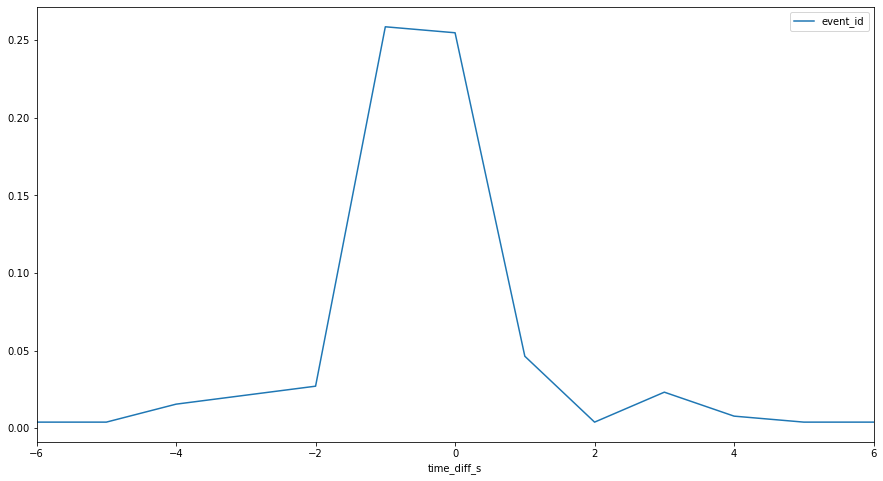

In [34]:
'''
positive = IssueCommentEvent happened before IssueEvent - reopened
'''

ax = (
    df_reopening_issue_with_comment
    .assign(time_diff_s=lambda d: d.time_diff / pd.to_timedelta("1s"))
    .groupby('time_diff_s').count()[['event_id']]
    .assign(event_id=lambda d: d.event_id/d.event_id.sum())
    .plot(figsize=(15,8))
)
ax.set(xlim=(-6,6))

In [35]:
all_events_num = df_reopening_issue_with_comment.groupby('event_id',as_index=False).count().shape[0]
pair_events_num = (
    df_reopening_issue_with_comment[(df_reopening_issue_with_comment['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                                    (df_reopening_issue_with_comment['time_diff'] >= LOWER_TIME_THRESHOLD)]
    .groupby('event_id',as_index=False)
    .count()
    .shape[0]
)
all_events.append(all_events_num)
pair_events.append(pair_events_num)
print(f'{(pair_events_num/all_events_num)*100}% events are occurring together')

69.86301369863014% events are occurring together


In [36]:
df_reopening_issue_with_comment = df_reopening_issue_with_comment[(df_reopening_issue_with_comment['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                                                                (df_reopening_issue_with_comment['time_diff'] >= LOWER_TIME_THRESHOLD)]
list_event_id_covered.extend(df_reopening_issue_with_comment['event_id'].astype('int').to_list())
list_event_id_covered.extend(df_reopening_issue_with_comment['comm_event_id'].astype('int').to_list())

issue_reop_comm_event_covered = []
issue_reop_comm_event_covered.extend(df_reopening_issue_with_comment['event_id'].astype('int').to_list())
issue_reop_comm_event_covered.extend(df_reopening_issue_with_comment['comm_event_id'].astype('int').to_list())

df_reopening_issue_with_comment_proc = (
    df_reopening_issue_with_comment
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(status="open")
    .assign(created_at=lambda d: d.issue_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=None)
    .assign(activity='Reopening issue')
    .assign(id=lambda d: d.issue_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(resolved=False)
    .assign(length=lambda d: np.where(d.comm_comment.str.len()>0, d.comm_comment.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
    [['date','contributor','activity','repository','id','title','status','length','issue_node_id','comm_comment_node_id',
      'comments','resolved','created_at','closed_at','acc_type']]
)

df_reopening_issue_with_comment_proc['issue'] = (
    df_reopening_issue_with_comment_proc
    .rename(columns={'issue_node_id':'GH_node'})
    [issue_field]
    .to_dict('records')
)
df_reopening_issue_with_comment_proc['conversation']=df_reopening_issue_with_comment_proc[['comments']].to_dict('records')
df_reopening_issue_with_comment_proc['comment'] = (
    df_reopening_issue_with_comment_proc
    .rename(columns={'comm_comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_reopening_issue_with_comment_proc=df_reopening_issue_with_comment_proc.sort_values('date')

display(df_reopening_issue_with_comment_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comm_comment_node_id',
                                                                     'id','title','created_at','status','closed_at','resolved','issue_node_id','comments']])

dict_reopening_issue_with_comment_bot = df_reopening_issue_with_comment_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                                       'repository','comment','issue',
                                                                                                       'conversation']].to_dict('records')
dict_reopening_issue_with_comment_human = df_reopening_issue_with_comment_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                                           'repository','comment','issue',
                                                                                                           'conversation']].to_dict('records')

,date,activity,contributor,repository,length,comm_comment_node_id,id,title,created_at,status,closed_at,resolved,issue_node_id,comments
150483,2022-11-26T23:00:53+00:00,Reopening issue,jetstack-bot,cert-manager/cert-manager,517,IC_kwDOBYCWqs5PKZ9E,5246,Secrets are not updated when key stores added/...,2022-06-29T07:40:04+00:00,open,None,False,I_kwDOBYCWqs5Mye9h,6
13501,2022-11-28T15:26:33+00:00,Reopening issue,kibanamachine,elastic/kibana,127,IC_kwDOAHeGUM5PO27K,100951,Failing test: Jest Tests.x-pack/plugins/cross_...,2021-05-28T21:10:29+00:00,open,None,False,MDU6SXNzdWU5MDYwNjM3NzY=,13
16067,2022-11-28T22:08:49+00:00,Reopening issue,gopherbot,golang/go,122922,IC_kwDOAWBuf85PQ2yr,56215,os: timeout on NetBSD with os.(*Process).Wait,2022-10-13T17:07:10+00:00,open,None,False,I_kwDOAWBuf85T7qv6,9
13746,2022-11-29T14:33:49+00:00,Reopening issue,kibanamachine,elastic/kibana,127,IC_kwDOAHeGUM5PUYE8,142155,Failing test: Chrome X-Pack UI Functional Test...,2022-09-28T20:08:41+00:00,open,None,False,I_kwDOAHeGUM5S2Aon,10
13890,2022-11-30T16:13:30+00:00,Reopening issue,kibanamachine,elastic/kibana,127,IC_kwDOAHeGUM5PavKC,72874,Failing test: X-Pack Endpoint Functional Tests...,2020-07-22T15:18:55+00:00,open,None,False,MDU6SXNzdWU2NjM4NDQ1MTM=,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,2023-01-25T16:38:37+00:00,Reopening issue,gopherbot,golang/go,33503,IC_kwDOAWBuf85Trdqa,57887,x/tools/gopls/test: TestDirectoryFilters_Multi...,2023-01-18T03:51:10+00:00,open,None,False,I_kwDOAWBuf85bokZ9,3
3137,2023-01-25T16:38:39+00:00,Reopening issue,gopherbot,golang/go,9711,IC_kwDOAWBuf85TrdrA,57888,x/tools/gopls/test: TestIgnoreFile failures,2023-01-18T03:51:11+00:00,open,None,False,I_kwDOAWBuf85bokaN,3
3135,2023-01-25T16:38:41+00:00,Reopening issue,gopherbot,golang/go,10455,IC_kwDOAWBuf85Trdry,57889,x/tools/gopls/test: TestStandaloneFiles failures,2023-01-18T03:51:13+00:00,open,None,False,I_kwDOAWBuf85bokac,3
3133,2023-01-25T16:38:43+00:00,Reopening issue,gopherbot,golang/go,9249,IC_kwDOAWBuf85Trdsf,57890,x/tools/gopls/test: TestClearAnalysisDiagnosti...,2023-01-18T03:51:14+00:00,open,None,False,I_kwDOAWBuf85bokal,3


In [37]:
'''
Filter out the reopenend issue events that did not invovle any commeting activity while closing
'''
df_reopening_issue_without_comment= (
    df_events
    .query('event_type == "IssuesEvent" and action == "reopened" and event_id not in @issue_reop_comm_event_covered')
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_closed_at','issue_number','num_comments',
      'title','body','close_reason','issue_node_id','acc_type']]
)

list_event_id_covered.extend(df_reopening_issue_without_comment['event_id'].astype('int').to_list())

df_reopening_issue_without_comment_proc = (
    df_reopening_issue_without_comment
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(status="open")
    .assign(created_at=lambda d: d.issue_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=None)
    .assign(activity='Reopening issue')
    .assign(id=lambda d: d.issue_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(length=0)
    .assign(resolved=False)
    .assign(length = lambda d: d.length.astype('int'))
    .assign(comm_comment_node_id=None)
    [['date','contributor','activity','repository','id','title','status','comments','resolved',
      'length','issue_node_id','comm_comment_node_id','created_at','closed_at','acc_type']]
)

df_reopening_issue_without_comment_proc['issue'] = (
    df_reopening_issue_without_comment_proc
    .rename(columns={'issue_node_id':'GH_node'})
    [issue_field]
    .to_dict('records')
)
df_reopening_issue_without_comment_proc['conversation']=df_reopening_issue_without_comment_proc[['comments']].to_dict('records')
df_reopening_issue_without_comment_proc['comment'] = (
    df_reopening_issue_without_comment_proc
    .rename(columns={'comm_comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_reopening_issue_without_comment_proc=df_reopening_issue_without_comment_proc.sort_values('date')

display(df_reopening_issue_without_comment_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comm_comment_node_id',
                                                                     'id','title','created_at','status','closed_at','resolved','issue_node_id','comments']])

dict_reopening_issue_without_comment_bot=df_reopening_issue_without_comment_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                                           'repository','comment','issue',
                                                                                                           'conversation']].to_dict('records')
dict_reopening_issue_without_comment_human=df_reopening_issue_without_comment_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                                               'repository','comment','issue',
                                                                                                               'conversation']].to_dict('records')

,date,activity,contributor,repository,length,comm_comment_node_id,id,title,created_at,status,closed_at,resolved,issue_node_id,comments
69003,2022-11-25T10:50:15+00:00,Reopening issue,echarts-bot[bot],apache/echarts,0,None,17977,[Bug] 关系图节点无法正常高亮,2022-11-25T10:49:23+00:00,open,None,False,I_kwDOAIwqAM5XSGrz,2
21555,2022-11-26T14:41:26+00:00,Reopening issue,minikube-bot,kubernetes/minikube,0,None,13474,Frequent test failures of `TestIngressAddonLeg...,2022-01-25T08:17:45+00:00,open,None,False,I_kwDOA1vjzM5CX51L,3
16115,2022-11-28T18:11:03+00:00,Reopening issue,gopherbot,golang/go,0,None,55202,runtime: TestSpuriousWakeupsNeverHangSemasleep...,2022-09-20T04:39:47+00:00,open,None,False,I_kwDOAWBuf85SLvRX,3
21831,2022-12-02T18:41:29+00:00,Reopening issue,minikube-bot,kubernetes/minikube,0,None,13237,Frequent test failures of `TestFunctional/para...,2021-12-24T02:17:38+00:00,open,None,False,I_kwDOA1vjzM5A2w6b,1
21830,2022-12-02T18:41:30+00:00,Reopening issue,minikube-bot,kubernetes/minikube,0,None,13238,Frequent test failures of `TestFunctional/para...,2021-12-24T02:17:39+00:00,open,None,False,I_kwDOA1vjzM5A2w6h,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155,2023-01-25T16:38:24+00:00,Reopening issue,gopherbot,golang/go,0,None,57879,x/tools/gopls/test: TestNewDepWithUnusedDep fa...,2023-01-18T03:50:58+00:00,open,None,False,I_kwDOAWBuf85bokYG,3
3153,2023-01-25T16:38:25+00:00,Reopening issue,gopherbot,golang/go,0,None,57880,x/tools/gopls/test: TestBadlyVersionedModule f...,2023-01-18T03:50:59+00:00,open,None,False,I_kwDOAWBuf85bokYT,3
3143,2023-01-25T16:38:34+00:00,Reopening issue,gopherbot,golang/go,0,None,57885,x/tools/gopls/test: TestBrokenWorkspace_WrongM...,2023-01-18T03:51:08+00:00,open,None,False,I_kwDOAWBuf85bokZn,3
3141,2023-01-25T16:38:35+00:00,Reopening issue,gopherbot,golang/go,0,None,57886,x/tools/gopls/test: TestDirectoryFilters_Impor...,2023-01-18T03:51:09+00:00,open,None,False,I_kwDOAWBuf85bokZz,3


In [38]:
reopening_issue_bot = []
reopening_issue_bot.extend(dict_reopening_issue_with_comment_bot)
reopening_issue_bot.extend(dict_reopening_issue_without_comment_bot)

reopening_issue_human = []
reopening_issue_human.extend(dict_reopening_issue_with_comment_human)
reopening_issue_human.extend(dict_reopening_issue_without_comment_human)

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/reopening_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(reopening_issue_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/reopening_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(reopening_issue_human, file_object, indent=4)

#### Commenting in issue

In [39]:
'''
Filter the events based on IssueCommentEvent, where an issue_number exists
'''
df_issue_and_pr_commenting = (
    df_events
    .query('event_type == "IssueCommentEvent" and \
    event_id not in @issue_reop_comm_event_covered and \
    event_id not in @issue_comm_event_covered')
)
df_issue_commenting = (
    df_issue_and_pr_commenting[df_issue_and_pr_commenting['issue_number'].notnull()]
    [['event_id','event_type','login','repository','created_at','issue_created_at','issue_closed_at','issue_number','num_comments',
      'title','body','comment','close_reason','state','issue_node_id','comment_node_id','acc_type']]
)
df_issue_commenting = (
    df_issue_commenting
    .sort_values(['login','repository','created_at'])
    .rename(columns={'login': 'contributor',
                     'created_at': 'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(status=lambda d: d.state)
    .assign(created_at=lambda d: d.issue_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: np.where(d.issue_closed_at.notnull(), d.issue_closed_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat())
                                         , None))
    .assign(activity = "Commenting issue")
    .assign(id=lambda d: d.issue_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(resolved=lambda d: np.where(d.close_reason == "completed", True, False))
    .assign(length=lambda d: np.where(d.comment.str.len()>0, d.comment.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
)
df_issue_commenting['issue'] = (
    df_issue_commenting
    .rename(columns={'issue_node_id':'GH_node'})
    [issue_field]
    .to_dict('records')
)
df_issue_commenting['conversation']=df_issue_commenting[['comments']].to_dict('records')
df_issue_commenting['comment'] = (
    df_issue_commenting
    .rename(columns={'comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_issue_commenting=df_issue_commenting.sort_values('date')

list_event_id_covered.extend(df_issue_commenting['event_id'].to_list())

display(df_issue_commenting.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comment_node_id','id','title',
                                                      'created_at','status','closed_at','resolved','issue_node_id','comments']])

dict_issue_commenting_bot=df_issue_commenting.query('acc_type=="bot"')[['date','activity','contributor','repository',
                                                                        'comment','issue','conversation']].to_dict('records')

dict_issue_commenting_human=df_issue_commenting.query('acc_type=="human"')[['date','activity','contributor','repository',
                                                                        'comment','issue','conversation']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/commenting_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_issue_commenting_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/commenting_issue.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_issue_commenting_human, file_object, indent=4)

,date,activity,contributor,repository,length,comment_node_id,id,title,created_at,status,closed_at,resolved,issue_node_id,comments
116157,2022-11-25T10:02:31+00:00,Commenting issue,google-ml-butler[bot],tensorflow/tensorflow,145,IC_kwDOArmXAs5PHIp9,57964,tf.nn.ctc_loss documentation does not mention ...,2022-10-04T07:01:16+00:00,open,None,False,I_kwDOArmXAs5TMaVb,6
89315,2022-11-25T10:05:53+00:00,Commenting issue,welcome[bot],alist-org/alist,80,IC_kwDOE09S285PHJxk,2487,Is it possible to add support for ssh config f...,2022-11-25T10:05:50+00:00,open,None,False,I_kwDOE09S285XR4Yz,2
89313,2022-11-25T10:31:12+00:00,Commenting issue,welcome[bot],videojs/video.js,400,IC_kwDOAAotfs5PHQkU,8024,not working with Cloudflare HLS streams,2022-11-25T10:31:08+00:00,open,None,False,I_kwDOAAotfs5XSBkA,2
116156,2022-11-25T10:42:36+00:00,Commenting issue,google-ml-butler[bot],google/mediapipe,71,IC_kwDOC27xRM5PHTBU,3843,error building handtracking gpu example with b...,2022-11-10T13:07:23+00:00,open,None,False,I_kwDOC27xRM5WD9mq,3
158702,2022-11-25T10:42:57+00:00,Commenting issue,boring-cyborg[bot],golangci/golangci-lint,169,IC_kwDOB-BgJc5PHTGm,3376,"""no export data for"" error since v1.44",2022-11-25T10:42:55+00:00,open,None,False,I_kwDOB-BgJc5XSE41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43344,2023-01-25T16:46:41+00:00,Commenting issue,welcome[bot],meshery/meshery,379,IC_kwDOCWQXL85TrgTy,6931,Grammatical Mistake in README.md,2023-01-25T16:46:38+00:00,open,None,False,I_kwDOCWQXL85czWAE,2
3114,2023-01-25T16:49:23+00:00,Commenting issue,gopherbot,golang/go,5064,IC_kwDOAWBuf85TrhLU,57995,Testing packages.: unrecognized failures,2023-01-25T16:36:59+00:00,open,None,False,I_kwDOAWBuf85czS5D,3
43343,2023-01-25T16:50:44+00:00,Commenting issue,welcome[bot],meshery/meshery.io,317,IC_kwDODTjIIs5Trhpr,995,[UI] Improve The UI for Mobile devices Unexpec...,2023-01-17T18:29:49+00:00,open,None,False,I_kwDODTjIIs5czXS-,2
3108,2023-01-25T16:56:00+00:00,Commenting issue,gopherbot,golang/go,115,IC_kwDOAWBuf85TrjgM,57993,os: TestCloseWithBlockingReadByNewFile failures,2023-01-25T16:36:55+00:00,open,None,False,I_kwDOAWBuf85czS3k,3


#### Opening a pull request

In [40]:
df_opening_pullrequest = (
    df_events
    .query('event_type == "PullRequestEvent" and action == "opened"')
    [['event_id','event_type','login','repository','created_at','action','PR_number','PR_created_at','num_comments','draft','title',
      'body','merged','num_review_comments','num_changed_files','num_commits','PR_node_id','acc_type']]
    .rename(columns={'login':'contributor', 'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(activity='Opening pull request')
    .assign(status="open")
    .assign(created_at=lambda d: d.PR_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=None)
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
#     .assign(review_comments=lambda d: d.num_review_comments.astype('int'))
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(pr_changed_files=lambda d: d.num_changed_files.astype('int'))
    .assign(pr_commits=lambda d: d.num_commits.astype('int'))
    .assign(length=lambda d: np.where(d.body.str.len()>0, d.body.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
    .assign(GH_node=lambda d: d.PR_node_id)
)

list_event_id_covered.extend(df_opening_pullrequest['event_id'].to_list())
df_opening_pullrequest['pull_request'] = df_opening_pullrequest[pr_field].to_dict('records')
df_opening_pullrequest['conversation']=df_opening_pullrequest[['comments']].to_dict('records')
df_opening_pullrequest['comment']=df_opening_pullrequest[['length','GH_node']].to_dict('records')
df_opening_pullrequest['payload']=df_opening_pullrequest[['pr_commits','pr_changed_files']].to_dict('records')
df_opening_pullrequest=df_opening_pullrequest.sort_values('date')

display(df_opening_pullrequest.query('acc_type=="bot"')[['date','activity','contributor','repository','length','GH_node','id','title',
                                                         'created_at','status','closed_at','merged','GH_node','comments']])

#saving bot events
dict_opening_pullrequest_bot=df_opening_pullrequest.query('acc_type=="bot"')[['date','activity','contributor','repository','comment',
                                                                              'pull_request','conversation','payload']].to_dict('records')

#saving human events
dict_opening_pullrequest_human=df_opening_pullrequest.query('acc_type=="human"')[['date','activity','contributor','repository','comment',
                                                                                  'pull_request','conversation','payload']].to_dict('records')
if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/opening_pullrequest.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_opening_pullrequest_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/opening_pullrequest.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_opening_pullrequest_human, file_object, indent=4)

,date,activity,contributor,repository,length,GH_node,id,title,created_at,status,closed_at,merged,GH_node,comments
134150,2022-11-25T10:01:11+00:00,Opening pull request,restyled-io[bot],tediorewf/computer-graphics,905,PR_kwDOH5Sl_85Dshqd,83,Restyle Доработки по текстурированию,2022-11-25T10:01:10+00:00,open,None,False,PR_kwDOH5Sl_85Dshqd,1
74885,2022-11-25T10:03:50+00:00,Opening pull request,ballerina-bot,ballerina-platform/ballerina-performance-cloud,0,PR_kwDOFoSWDM5DsinE,9546,[Automated] Update summary csv files,2022-11-25T10:03:49+00:00,open,None,False,PR_kwDOFoSWDM5DsinE,1
53286,2022-11-25T10:08:49+00:00,Opening pull request,openshift-cherrypick-robot,openshift/assisted-service,63,PR_kwDOEHKbP85DskUF,4672,[cloud_hotfix_releases] MGMT-12686: Allow inst...,2022-11-25T10:08:48+00:00,open,None,False,PR_kwDOEHKbP85DskUF,1
103245,2022-11-25T10:18:01+00:00,Opening pull request,cheminfo-bot,cheminfo/baselines,475,PR_kwDOEWMJhM5Dsnro,29,chore(master): release 1.1.4,2022-11-25T10:18:00+00:00,open,None,False,PR_kwDOEWMJhM5Dsnro,1
53283,2022-11-25T10:19:02+00:00,Opening pull request,openshift-cherrypick-robot,openshift/cluster-csi-snapshot-controller-oper...,58,PR_kwDODdbmwM5Dsn8v,134,[release-4.12] OCPBUGS-3973: Don't remove PDB ...,2022-11-25T10:19:01+00:00,open,None,False,PR_kwDODdbmwM5Dsn8v,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57537,2023-01-25T16:33:47+00:00,Opening pull request,osrfbuild,osrf/homebrew-simulation,0,PR_kwDOALOfMc5Ih2Kl,2184,gz-sim7 7.2.0,2023-01-25T16:33:45+00:00,open,None,False,PR_kwDOALOfMc5Ih2Kl,1
41646,2023-01-25T16:35:41+00:00,Opening pull request,engine-flutter-autoroll,flutter/flutter,767,PR_kwDOAeUeuM5Ih2se,119159,Roll Flutter Engine from 6f806491e103 to 24aa3...,2023-01-25T16:35:40+00:00,open,None,False,PR_kwDOAeUeuM5Ih2se,1
73171,2023-01-25T16:36:16+00:00,Opening pull request,backportbot-nextcloud[bot],nextcloud/photos,17,PR_kwDODRYil85Ih23Z,1612,[stable25] Correctly listen to group change ev...,2023-01-25T16:36:15+00:00,open,None,False,PR_kwDODRYil85Ih23Z,1
41102,2023-01-25T16:56:35+00:00,Opening pull request,skia-flutter-autoroll,flutter/engine,880,PR_kwDOAlZRSc5Ih8rA,39131,Roll Skia from c4b171fe5668 to 876b045881a6 (2...,2023-01-25T16:56:34+00:00,open,None,False,PR_kwDOAlZRSc5Ih8rA,1


#### Reopening pull request

In [41]:
'''
We have 2 dfs - df_reopening_pr_before_comment and df_reopening_pr_after_comment
Commenting under pull request is reported under IssueCommentEvent, so we need to remove the events corresponding to commeting under issues.

Then we replace the values with NaN wherever login, repo and PR_number are different between PullRequestEventEvent and IssueCommentEvent, and 
merge both the df's
'''

df_reopening_issue_or_PR_comment = (
    df_events
    .query('(event_type == "PullRequestEvent" and action == "reopened") or event_type == "IssueCommentEvent"')
    .drop_duplicates()
    [['event_id','event_type','login','repository','created_at','issue_created_at','PR_created_at','PR_number','merged',
      'draft','title','body','num_changed_files','num_commits','state','num_comments','num_review_comments','comment',
      'PR_node_id','comment_node_id','acc_type']]
    .sort_values(['login','repository','created_at'])
)

df_reopening_pr_and_comment_1 = df_reopening_issue_or_PR_comment[df_reopening_issue_or_PR_comment['PR_number'].notnull()]

df_reopening_pr_before_comment = (
    df_reopening_pr_and_comment_1
    .assign(next_event_id=lambda d: d.event_id.shift(-1))
    .assign(next_event=lambda d: d.event_type.shift(-1))
    .assign(next_login=lambda d: d.login.shift(-1))
    .assign(next_repository=lambda d: d.repository.shift(-1))
    .assign(next_pr_number=lambda d: d.PR_number.shift(-1))
    .assign(next_pr_title=lambda d: d.title.shift(-1))
    .assign(next_comment=lambda d: d.comment.shift(-1))
    .assign(next_event_created_at=lambda d: d.created_at.shift(-1))
    .assign(next_event_pr_created_at=lambda d: d.issue_created_at.shift(-1))
    .assign(next_event_num_comment=lambda d: d.num_comments.shift(-1))
    .assign(next_event_num_review_comments=lambda d: d.num_review_comments.shift(-1))
    .assign(next_event_node_id=lambda d: d.comment_node_id.shift(-1))
    .assign(comm_event_type=lambda d: 
            np.where(((d.event_type == "PullRequestEvent") & (d.next_event == "IssueCommentEvent") & 
                      (d.login == d.next_login) & (d.repository == d.next_repository) &
                      (d.PR_number == d.next_pr_number)), 
                     d.next_event, np.nan))
    .query('event_type == "PullRequestEvent" and comm_event_type == "IssueCommentEvent"')
    .rename(columns={'next_event_created_at':'comm_created_at', 'next_pr_number':'comm_pr_number', 
                     'next_repository':'comm_repository', 'next_login':'comm_login', 
                     'next_event_id':'comm_event_id', 'next_event_num_comment':'comm_num_comment', 
                     'next_comment':'comm_comment', 'next_event_pr_created_at':'comm_pr_created_at',
                     'next_pr_title': 'comm_pr_title', 'next_event_node_id': 'comm_comment_node_id'})
    .assign(time_diff=lambda d: d.created_at - d.comm_created_at)
    [['event_id','event_type','login','repository','created_at','PR_created_at','PR_number','num_comments','num_changed_files',
      'num_commits','num_review_comments','title','body','state','merged','draft','comment','PR_node_id',
      'comm_event_id','comm_event_type','comm_login','comm_repository','comm_created_at','comm_pr_created_at',
      'comm_pr_number','comm_pr_title','comm_num_comment','comm_comment','comm_comment_node_id','time_diff','acc_type']]
)

df_reopening_pr_after_comment = (
    df_reopening_pr_and_comment_1
    .assign(prev_event_id=lambda d: d.event_id.shift(1))
    .assign(prev_event=lambda d: d.event_type.shift(1))
    .assign(prev_login=lambda d: d.login.shift(1))
    .assign(prev_repository=lambda d: d.repository.shift(1))
    .assign(prev_pr_number=lambda d: d.PR_number.shift(1))
    .assign(prev_pr_title=lambda d: d.title.shift(1))
    .assign(prev_comment=lambda d: d.comment.shift(1))
    .assign(prev_event_created_at=lambda d: d.created_at.shift(1))
    .assign(prev_event_pr_created_at=lambda d: d.issue_created_at.shift(1))
    .assign(prev_event_num_comment=lambda d: d.num_comments.shift(1))
    .assign(prev_event_num_review_comments=lambda d: d.num_review_comments.shift(1))
    .assign(prev_event_node_id=lambda d: d.comment_node_id.shift(1))
    .assign(comm_event_type=lambda d:
            np.where(((d.event_type == "PullRequestEvent") & (d.prev_event == "IssueCommentEvent") & 
                      (d.login == d.prev_login) & (d.repository == d.prev_repository) &
                      (d.PR_number == d.prev_pr_number)), 
                     d.prev_event, np.nan))
    .query('event_type == "PullRequestEvent" and comm_event_type == "IssueCommentEvent"')
    .rename(columns={'prev_event_created_at':'comm_created_at', 'prev_pr_number':'comm_pr_number',
                     'prev_repository':'comm_repository', 'prev_login':'comm_login', 
                     'prev_event_id':'comm_event_id', 'prev_event_num_comment':'comm_num_comment', 
                     'prev_comment':'comm_comment', 'prev_event_pr_created_at':'comm_pr_created_at',
                     'prev_pr_title': 'comm_pr_title', 'prev_event_node_id': 'comm_comment_node_id'})
    .assign(time_diff=lambda d: d.created_at - d.comm_created_at)
    
    [['event_id','event_type','login','repository','created_at','issue_created_at','PR_created_at','PR_number','num_comments','num_changed_files',
      'num_commits','num_review_comments','title','body','state','merged','draft','comment','PR_node_id',
      'comm_event_id','comm_event_type','comm_login','comm_repository','comm_created_at','comm_pr_created_at',
      'comm_pr_number','comm_pr_title','comm_num_comment','comm_comment','comm_comment_node_id','time_diff','acc_type']]
)

df_reopening_pr_with_comment = pd.concat([df_reopening_pr_before_comment, df_reopening_pr_after_comment])

[(-6.0, 6.0)]

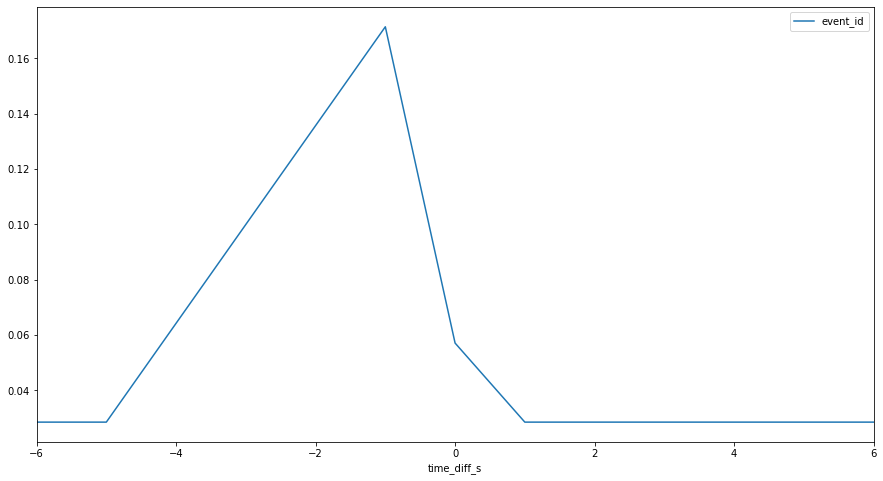

In [42]:
'''
positive = IssueCommentEvent happened before PullRequestEvent - reopened
'''
ax = (
    df_reopening_pr_with_comment
    .assign(time_diff_s=lambda d: d.time_diff / pd.to_timedelta("1s"))
    .groupby('time_diff_s').count()[['event_id']]
    .assign(event_id=lambda d: d.event_id/d.event_id.sum())
    .plot(figsize=(15,8))
)
ax.set(xlim=(-6,6))

In [43]:
all_events_num = df_reopening_pr_with_comment.groupby('event_id',as_index=False).count().shape[0]
pair_events_num = (
    df_reopening_pr_with_comment[(df_reopening_pr_with_comment['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                                    (df_reopening_pr_with_comment['time_diff'] >= LOWER_TIME_THRESHOLD)]
    .groupby('event_id',as_index=False)
    .count()
    .shape[0]
)
all_events.append(all_events_num)
pair_events.append(pair_events_num)
print(f'{(pair_events_num/all_events_num)*100}% events are occurring together')

38.46153846153847% events are occurring together


In [44]:
'''
Save the event_ids that are processed in the PullRequestEvent and its corresponding IssueCommentEvent
Change the field names and create the dataframe in the required format to be saved in .json
text_length>0 = comment and close is done
text_length=0 closed without any comment
'''
df_reopening_pr_with_comment = df_reopening_pr_with_comment[(df_reopening_pr_with_comment['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                                                                (df_reopening_pr_with_comment['time_diff'] >= LOWER_TIME_THRESHOLD)]
list_event_id_covered.extend(df_reopening_pr_with_comment['event_id'].astype('int').to_list())
list_event_id_covered.extend(df_reopening_pr_with_comment['comm_event_id'].astype('int').to_list())

pr_reop_comm_event_covered = []
pr_reop_comm_event_covered.extend(df_reopening_pr_with_comment['event_id'].astype('int').to_list())
pr_reop_comm_event_covered.extend(df_reopening_pr_with_comment['comm_event_id'].astype('int').to_list())

df_reopening_pr_with_comment_proc = (
    df_reopening_pr_with_comment
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(status=lambda d: d.state)
    .assign(created_at=lambda d: d.PR_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=None)
    .assign(activity='Reopening pull request')
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(pr_changed_files=lambda d: d.num_changed_files.astype('int'))
    .assign(pr_commits=lambda d: d.num_commits.astype('int'))
    .assign(length=lambda d: np.where(d.comm_comment.str.len()>0, d.comm_comment.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
    [['date','contributor','activity','repository','id','title','status','comments','pr_changed_files',
      'pr_commits','merged','length','PR_node_id','comm_comment_node_id','created_at','closed_at','acc_type']]
)
df_reopening_pr_with_comment_proc['pull_request'] = (
    df_reopening_pr_with_comment_proc
    .rename(columns={'PR_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_reopening_pr_with_comment_proc['conversation']=df_reopening_pr_with_comment_proc[['comments']].to_dict('records')
df_reopening_pr_with_comment_proc['comment'] = (
    df_reopening_pr_with_comment_proc
    .rename(columns={'comm_comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_reopening_pr_with_comment_proc['payload'] = df_reopening_pr_with_comment_proc[['pr_commits','pr_changed_files']].to_dict('records')
df_reopening_pr_with_comment_proc=df_reopening_pr_with_comment_proc.sort_values('date')

display(df_reopening_pr_with_comment_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comm_comment_node_id','id',
                                                                    'title','created_at','status','closed_at','merged','PR_node_id','comments']])

dict_reopening_pr_with_comment_bot = df_reopening_pr_with_comment_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                                 'repository','comment','pull_request',
                                                                                                 'conversation','payload']].to_dict('records')
dict_reopening_pr_with_comment_human = df_reopening_pr_with_comment_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                                     'repository','comment','pull_request',
                                                                                                     'conversation','payload']].to_dict('records')

,date,activity,contributor,repository,length,comm_comment_node_id,id,title,created_at,status,closed_at,merged,PR_node_id,comments
49481,2022-12-21T11:28:19+00:00,Reopening pull request,kubevirt-bot,kubevirt/kubevirt,538,IC_kwDOBJIk985RIjjZ,8965,[release-0.58] e2e test: Fix flaky test increa...,2022-12-16T13:21:53+00:00,open,None,False,PR_kwDOBJIk985Fo91w,5
49598,2022-12-22T22:19:50+00:00,Reopening pull request,kubevirt-bot,kubevirt/kubevirt,504,IC_kwDOBJIk985RQ9Lf,7862,Store the finalized VMI migration status in th...,2022-06-06T16:23:09+00:00,open,None,False,PR_kwDOBJIk9845Lc_v,13
115096,2023-01-04T18:15:37+00:00,Reopening pull request,tekton-robot,tektoncd/pipeline,505,IC_kwDOCL2Q_s5Ru9Ep,5937,Add `taskrun.status.cloudEvents` to deprecatio...,2023-01-03T19:07:21+00:00,open,None,False,PR_kwDOCL2Q_s5GkAUA,4
48447,2023-01-16T07:40:49+00:00,Reopening pull request,kubevirt-bot,kubevirt/community,502,IC_kwDOBJAUy85SeDKY,186,proposal: Macvtap mode for pod networking,2022-08-03T12:55:46+00:00,open,None,False,PR_kwDOBJAUy848kyeM,8
88632,2023-01-18T14:34:59+00:00,Reopening pull request,metal3-io-bot,metal3-io/metal3-docs,506,IC_kwDOCciW7M5SrpW3,268,Proposal of adding metal3host operator.,2022-07-07T01:52:51+00:00,open,None,False,PR_kwDOCciW7M46-4-l,9
7768,2023-01-22T21:16:07+00:00,Reopening pull request,kubevirt-bot,kubevirt/hyperconverged-cluster-operator,526,IC_kwDOClUNv85TbF0x,2206,Kubevirt: Enforce limits & requests by a confi...,2023-01-15T10:31:05+00:00,open,None,False,PR_kwDOClUNv85HZ7CM,66


In [45]:
'''
Filter out the reopenend issue events that did not invovle any commeting activity while closing
'''

df_reopening_pr_without_comment= (
    df_events
    .query('event_type == "PullRequestEvent" and action == "reopened" and event_id not in @pr_reop_comm_event_covered')
    [['event_id','event_type','login','repository','created_at','action','PR_number','PR_created_at','title','body',
      'merged','draft','state','num_changed_files','num_commits','num_review_comments','num_comments','PR_node_id','acc_type']]
    .rename(columns={'login':'contributor', 'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(status=lambda d: d.state)
    .assign(created_at=lambda d: d.PR_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=None)
    .assign(activity='Reopening pull request')
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(title=lambda d: d.title)
    .assign(pr_changed_files=lambda d: d.num_changed_files.astype('int'))
    .assign(pr_commits=lambda d: d.num_commits.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(length=0)
    .assign(length = lambda d: d.length.astype('int'))
    .assign(comm_comment_node_id=None)
)

list_event_id_covered.extend(df_reopening_pr_without_comment['event_id'].to_list())

df_reopening_pr_without_comment['pull_request'] = (
    df_reopening_pr_without_comment
    .rename(columns={'PR_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_reopening_pr_without_comment['conversation']=df_reopening_pr_without_comment[['comments']].to_dict('records')
df_reopening_pr_without_comment['comment'] = (
    df_reopening_pr_without_comment
    .rename(columns={'comm_comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_reopening_pr_without_comment['payload'] = df_reopening_pr_without_comment[['pr_commits','pr_changed_files']].to_dict('records')
df_reopening_pr_without_comment=df_reopening_pr_without_comment.sort_values('date')

display(df_reopening_pr_without_comment.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comm_comment_node_id','id',
                                                                  'title','created_at','status','closed_at','merged','PR_node_id','comments']].head(10))

# #saving bot events
dict_reopening_pr_without_comment_bot=df_reopening_pr_without_comment.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                                'repository','comment','pull_request',
                                                                                                'conversation','payload']].to_dict('records')
#saving human events
dict_reopening_pr_without_comment_human=df_reopening_pr_without_comment.query('acc_type=="human"')[['date','activity','contributor',
                                                                                                    'repository','comment','pull_request',
                                                                                                    'conversation','payload']].to_dict('records')

,date,activity,contributor,repository,length,comm_comment_node_id,id,title,created_at,status,closed_at,merged,PR_node_id,comments
29288,2022-11-26T10:22:56+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37058,[Gecko Bug 1800456] Add failIfNot function to ...,2022-11-21T20:13:37+00:00,open,None,False,PR_kwDOADc1Vc5DYvO9,1
29269,2022-11-30T23:30:13+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37183,[Gecko Bug 1791759] Add support for `content-v...,2022-11-28T09:58:28+00:00,open,None,False,PR_kwDOADc1Vc5DyX6O,1
29335,2022-12-03T11:27:27+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37300,[Gecko Bug 1638052] Implement Buttonborder/mar...,2022-12-02T20:06:30+00:00,open,None,False,PR_kwDOADc1Vc5EK4TN,1
29407,2022-12-13T15:29:34+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37388,[Gecko Bug 1800907] Do not `UnionRect` empty r...,2022-12-07T22:55:13+00:00,open,None,False,PR_kwDOADc1Vc5Es2Fj,1
29085,2022-12-16T09:05:20+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37519,[Gecko Bug 1586574] apply horizontal writing m...,2022-12-15T08:28:03+00:00,open,None,False,PR_kwDOADc1Vc5FhfUZ,1
29104,2022-12-16T12:11:26+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37546,[Gecko Bug 1790368] [wdspec] Add basic tests f...,2022-12-16T09:42:19+00:00,open,None,False,PR_kwDOADc1Vc5Fn6Ip,1
29128,2022-12-16T17:28:30+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37519,[Gecko Bug 1586574] apply horizontal writing m...,2022-12-15T08:28:03+00:00,open,None,False,PR_kwDOADc1Vc5FhfUZ,1
29285,2022-12-20T04:22:29+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37582,[Gecko Bug 1790677] Initial WebTransport IPC f...,2022-12-19T18:58:46+00:00,open,None,False,PR_kwDOADc1Vc5FztGV,1
29292,2022-12-20T21:21:00+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37501,[Gecko Bug 1247687] Update wpt code to enable ...,2022-12-14T15:02:33+00:00,open,None,False,PR_kwDOADc1Vc5Fddzi,2
29173,2022-12-22T02:42:51+00:00,Reopening pull request,moz-wptsync-bot,web-platform-tests/wpt,0,None,37612,[Gecko Bug 1800136] Test-cases for ICE candida...,2022-12-20T22:39:20+00:00,open,None,False,PR_kwDOADc1Vc5F6RkK,1


In [46]:
reopening_pr_bot = []
reopening_pr_bot.extend(dict_reopening_pr_with_comment_bot)
reopening_pr_bot.extend(dict_reopening_pr_without_comment_bot)

reopening_pr_human = []
reopening_pr_human.extend(dict_reopening_pr_with_comment_human)
reopening_pr_human.extend(dict_reopening_pr_without_comment_human)

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/reopening_pullrequest.json'
    with open(file_name, 'w') as file_object:
        json.dump(reopening_pr_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/reopening_pullrequest.json'
    with open(file_name, 'w') as file_object:
        json.dump(reopening_pr_human, file_object, indent=4)

#### Closing PR
#### 1. Closing PR and merging it (cannot comment) with a push
#### 2. Closing PR and merging it, no push detected - PR is closed, but its corresponding push event (same sha) has happened long back, no push for some PRs
#### 3. Closing PR and rejecting it, with comment
#### 4. Closing PR and rejecting it, without comment

In [47]:
df_pr_merge = (
    df_events
    .query('event_type == "PullRequestEvent" and action == "closed" and merged == True')
    .dropna(axis=1, how='all')
)
df_push_events = (
    df_events
    .query('event_type == "PushEvent"')
    .dropna(axis=1, how='all')
)

df_pr_merge_push = pd.merge(df_pr_merge, df_push_events, left_on=['login','repository'], right_on=['login','repository'])
df_pr_merge_push = (
    df_pr_merge_push
    [['event_id_x','event_type_x','login','repository','created_at_x','PR_number','title','num_comments',
      'num_commits','num_review_comments','PR_created_at','PR_closed_at','merged','draft','num_changed_files','PR_node_id',
      'acc_type_x','event_id_y','event_type_y','created_at_y']]
    .rename(columns = {'event_id_x':'pr_event_id',
                       'event_type_x':'pr_event_type',
                       'login':'contributor',
                       'created_at_x':'date',
                       'PR_number':'pr_number',
                       'PR_created_at':'creation_date',
                       'PR_closed_at':'closed_date',
                       'acc_type_x':'acc_type',
                       'event_id_y':'push_event_id',
                       'event_type_y':'push_events_type',
                       'created_at_y':'push_date'})
    .assign(time_diff = lambda d: d.date - d.push_date)
)

[(-6.0, 6.0)]

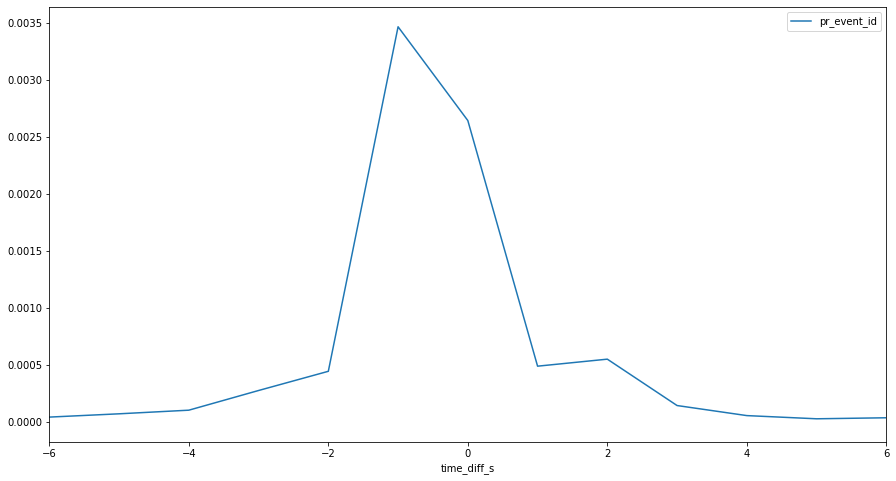

In [48]:
'''
positive = PushEvent happened before PR close
'''

ax = (
    df_pr_merge_push
    .assign(time_diff_s=lambda d: d.time_diff / pd.to_timedelta("1s"))
    .groupby('time_diff_s').count()[['pr_event_id']]
    .assign(pr_event_id=lambda d: d.pr_event_id/d.pr_event_id.sum())
    .plot(figsize=(15,8))
)
ax.set(xlim=(-6,6))

In [49]:
all_events_num = df_pr_merge_push.groupby('pr_event_id',as_index=False).count().shape[0]
pair_events_num = (
    df_pr_merge_push[(df_pr_merge_push['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                     (df_pr_merge_push['time_diff'] >= LOWER_TIME_THRESHOLD)]
    .groupby('pr_event_id',as_index=False)
    .count()
    .shape[0]
)
all_events.append(all_events_num)
pair_events.append(pair_events_num)
print(f'{(pair_events_num/all_events_num)*100}% events are occurring together')

89.27945521005458% events are occurring together


In [50]:
pr_close_with_push = df_pr_merge_push[(df_pr_merge_push['time_diff'] <= '0 days 00:00:02') &
                                      (df_pr_merge_push['time_diff'] >= '-1 days +23:59:58')]
list_event_id_covered.extend(pr_close_with_push['pr_event_id'].to_list())
list_event_id_covered.extend(pr_close_with_push['push_event_id'].astype('int').to_list())

pr_close_push_event_covered = []
pr_close_push_event_covered.extend(pr_close_with_push['pr_event_id'].to_list())
pr_close_push_event_covered.extend(pr_close_with_push['push_event_id'].astype('int').to_list())

df_pr_close_with_push_proc = (
    pr_close_with_push
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(created_at=lambda d: d.creation_date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: d.closed_date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(activity='Closing pull request')
    .assign(status="closed")
    .assign(id=lambda d: d.pr_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(pr_commits=lambda d: d.num_commits.astype('int'))
    .assign(pr_changed_files=lambda d: d.num_changed_files.astype('int'))
    .assign(length=0)
    .assign(comment_node_id=None)
    [['date','contributor','activity','repository','id','title','merged','comments','pr_commits',
      'pr_changed_files','status','length','created_at','closed_at','PR_node_id','comment_node_id','acc_type']]
)
df_pr_close_with_push_proc['pull_request'] = (
    df_pr_close_with_push_proc
    .rename(columns={'PR_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_pr_close_with_push_proc['conversation']=df_pr_close_with_push_proc[['comments']].to_dict('records')
df_pr_close_with_push_proc['comment'] = (
    df_pr_close_with_push_proc
    .rename(columns={'comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_pr_close_with_push_proc['payload'] = df_pr_close_with_push_proc[['pr_commits','pr_changed_files']].to_dict('records')
df_pr_close_with_push_proc=df_pr_close_with_push_proc.sort_values('date')

display(df_pr_close_with_push_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comment_node_id','id',
                                                             'title','created_at','status','closed_at','merged','PR_node_id','comments']])

dict_pr_close_with_push_bot=df_pr_close_with_push_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                 'repository','comment','pull_request',
                                                                                 'conversation','payload']].to_dict('records')
dict_pr_close_with_push_human=df_pr_close_with_push_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                     'repository','comment','pull_request',
                                                                                     'conversation','payload']].to_dict('records')

,date,activity,contributor,repository,length,comment_node_id,id,title,created_at,status,closed_at,merged,PR_node_id,comments
828394,2022-11-25T10:06:32+00:00,Closing pull request,tekton-robot,tektoncd/plumbing,0,None,1289,Fix the cronjob deployment job,2022-11-24T17:13:01+00:00,closed,2022-11-25T10:06:31+00:00,True,PR_kwDOCsgBIc5DqWRn,2
831133,2022-11-25T10:10:02+00:00,Closing pull request,jujubot,juju/juju,0,None,14932,Create refCount for the label role only but no...,2022-11-25T06:31:12+00:00,closed,2022-11-25T10:10:01+00:00,True,PR_kwDOATf6-85Dr3Uf,2
6670,2022-11-25T10:17:13+00:00,Closing pull request,nodebb-misty,NodeBB/nodebb-plugin-link-mentions,0,None,21,chore(deps): update dependency lint-staged to ...,2022-11-25T10:17:11+00:00,closed,2022-11-25T10:17:12+00:00,True,PR_kwDOFPQtQc5DsneJ,1
6474,2022-11-25T10:19:17+00:00,Closing pull request,nodebb-misty,NodeBB/nodebb-theme-community,0,None,97,chore(deps): update dependency lint-staged to ...,2022-11-25T10:19:14+00:00,closed,2022-11-25T10:19:16+00:00,True,PR_kwDOGe1-ps5DsoAp,1
822620,2022-11-25T10:42:31+00:00,Closing pull request,tekton-robot,tektoncd/operator,0,None,1189,Bump pac to latest version,2022-11-25T10:15:52+00:00,closed,2022-11-25T10:42:30+00:00,True,PR_kwDOC7Q2kM5DsnIq,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624600,2023-01-25T15:48:05+00:00,Closing pull request,tekton-robot,tektoncd/pipeline,0,None,6040,TEP-0114: Switch to use FilterCustomRunRef - W...,2023-01-25T13:49:25+00:00,closed,2023-01-25T15:48:04+00:00,True,PR_kwDOCL2Q_s5Ig_Tp,7
1789264,2023-01-25T16:07:44+00:00,Closing pull request,softwarefactory-project-zuul[bot],packit/packit,0,None,1832,Add option to pass free-form TF parameters,2023-01-18T08:07:12+00:00,closed,2023-01-25T16:07:43+00:00,True,PR_kwDOCVH0f85Hml9T,12
1503517,2023-01-25T16:07:58+00:00,Closing pull request,jacogr,polkadot-js/apps,0,None,8883,Add bridge hub logos,2023-01-25T14:36:41+00:00,closed,2023-01-25T16:07:57+00:00,True,PR_kwDOB6xRes5IhOuc,3
2276848,2023-01-25T16:42:05+00:00,Closing pull request,tekton-robot,tektoncd/website,0,None,496,quick fix for typo,2023-01-25T04:41:01+00:00,closed,2023-01-25T16:42:04+00:00,True,PR_kwDOCmjP9s5Ie13C,4


In [51]:
'''
Filter PR events that are closed and merged, but dont have an associated push within the threshold
'''
df_pr_close_merge_no_push= (
    df_events
    .query('event_type == "PullRequestEvent" and action == "closed" and merged == True and event_id not in @pr_close_push_event_covered')
    [['event_id','event_type','login','repository','created_at','PR_number','title','num_comments','num_commits','PR_created_at',
      'num_review_comments','PR_closed_at','merged','draft','num_changed_files','PR_node_id','acc_type']]
    .rename(columns = {'event_id':'pr_event_id',
                       'login':'contributor',
                       'created_at':'date'})
)

list_event_id_covered.extend(df_pr_close_merge_no_push['pr_event_id'].to_list())

pr_close_event_covered = []
pr_close_event_covered.extend(df_pr_close_merge_no_push['pr_event_id'].to_list())

df_pr_close_merge_no_push_proc = (
    df_pr_close_merge_no_push
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(created_at=lambda d: d.PR_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: d.PR_closed_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(activity='Closing pull request')
    .assign(status="closed")
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).fillna(0).astype('int'))
    .assign(pr_commits=lambda d: d.num_commits.fillna(0).astype('int'))
    .assign(pr_changed_files=lambda d: d.num_changed_files.fillna(0).astype('int'))
    .assign(length=0)
    .assign(comment_node_id=None)
    [['date','contributor','activity','repository','id','title','status','merged','comments','pr_commits',
      'pr_changed_files','created_at','closed_at','length','PR_node_id','comment_node_id','acc_type']]
)
df_pr_close_merge_no_push_proc['pull_request'] = (
    df_pr_close_merge_no_push_proc
    .rename(columns={'PR_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_pr_close_merge_no_push_proc['conversation']=df_pr_close_merge_no_push_proc[['comments']].to_dict('records')
df_pr_close_merge_no_push_proc['comment'] = (
    df_pr_close_merge_no_push_proc
    .rename(columns={'comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_pr_close_merge_no_push_proc['payload'] = df_pr_close_merge_no_push_proc[['pr_commits','pr_changed_files']].to_dict('records')
df_pr_close_merge_no_push_proc=df_pr_close_merge_no_push_proc.sort_values('date')

display(df_pr_close_merge_no_push_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comment_node_id','id',
                                                                 'title','created_at','status','closed_at','merged','PR_node_id','comments']])

dict_pr_close_merge_no_push_proc_bot=df_pr_close_merge_no_push_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                              'repository','comment','pull_request',
                                                                                              'conversation','payload']].to_dict('records')
dict_pr_close_merge_no_push_proc_human=df_pr_close_merge_no_push_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                                  'repository','comment','pull_request',
                                                                                                  'conversation','payload']].to_dict('records')

,date,activity,contributor,repository,length,comment_node_id,id,title,created_at,status,closed_at,merged,PR_node_id,comments
149153,2022-11-25T11:07:41+00:00,Closing pull request,nodejs-github-bot,nodejs/node,0,None,45537,deps: update nghttp2 to 1.51.0,2022-11-20T04:43:26+00:00,closed,2022-11-25T11:07:40+00:00,True,PR_kwDOAZ7xs85DS8IU,11
66013,2022-11-25T11:42:48+00:00,Closing pull request,typescript-bot,DefinitelyTyped/DefinitelyTyped,0,None,63366,Update onAuthenticate function - resolve to bo...,2022-11-23T22:25:33+00:00,closed,2022-11-25T11:42:47+00:00,True,PR_kwDOAFz6BM5Dmepx,6
48856,2022-11-25T13:18:43+00:00,Closing pull request,miss-islington,python/cpython,0,None,99776,[3.10] bpo-38031: Fix a possible assertion fai...,2022-11-25T12:55:51+00:00,closed,2022-11-25T13:18:42+00:00,True,PR_kwDOBN0Z8c5DtQWE,1
48850,2022-11-25T13:21:01+00:00,Closing pull request,miss-islington,python/cpython,0,None,99779,[3.10] gh-96168: Add sqlite3 row factory how-t...,2022-11-25T13:07:40+00:00,closed,2022-11-25T13:21:00+00:00,True,PR_kwDOBN0Z8c5DtTwK,1
13345,2022-11-25T14:23:15+00:00,Closing pull request,kibanamachine,elastic/kibana,0,None,146344,[8.6] [Discover] Prevent agg based visualizati...,2022-11-25T13:20:18+00:00,closed,2022-11-25T14:23:14+00:00,True,PR_kwDOAHeGUM5DtXBK,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49499,2023-01-25T14:40:00+00:00,Closing pull request,dotnet-maestro[bot],dotnet/aspnetcore,0,None,46260,[main] Update dependencies from dotnet/runtime,2023-01-25T13:03:38+00:00,closed,2023-01-25T14:39:58+00:00,True,PR_kwDOAQzde85Igv1K,1
9208,2023-01-25T15:05:59+00:00,Closing pull request,jetstack-bot,cert-manager/cert-manager,0,None,5746,Remove the double cache mechanism for cainjector,2023-01-23T17:39:56+00:00,closed,2023-01-25T15:05:58+00:00,True,PR_kwDOBYCWqs5IWQ1Y,6
20972,2023-01-25T15:25:55+00:00,Closing pull request,typescript-bot,DefinitelyTyped/DefinitelyTyped,0,None,63852,[jsrsasign] add question mark for optional par...,2023-01-09T03:28:07+00:00,closed,2023-01-25T15:25:54+00:00,True,PR_kwDOAFz6BM5G8CBk,9
20969,2023-01-25T15:29:22+00:00,Closing pull request,typescript-bot,DefinitelyTyped/DefinitelyTyped,0,None,63818,[jsrsasign] add missing extname in ExtAuthorit...,2023-01-06T06:53:15+00:00,closed,2023-01-25T15:29:20+00:00,True,PR_kwDOAFz6BM5GyrMX,8


In [52]:
'''
PR merging and closing does not invovlve any comment, but PR rejecting and closing has comment (IssueCommentEvent) functionality.
So, identify the PR commeting activity associated with PR closing (reject) event

PullRequestEvent and IssueCommentEvent (PR comment) occur consecutively (order can differ) if they are done at the same time.
So, we have 2 dfs - df_closing_pr_before_comment and df_closing_pr_after_comment
Commenting under PR is reported under IssueCommentEvent, so we need to filter and get the events corresponding to commeting under PRs.

Then we replace the values with NaN or NaT where ever login, repo and pr_number are different between PullRequestEvent and IssueCommentEvent
merge both the df's
'''

df_closing_issue_or_PR_comment = (
    df_events
    .query('(event_type == "PullRequestEvent" and action == "closed" and merged == False) or event_type == "IssueCommentEvent"')
    .drop_duplicates()
    [['event_id','event_type','login','repository','created_at','PR_number','state','merged','draft','comment','num_comments','num_commits',
      'num_changed_files','num_review_comments','PR_created_at','PR_updated_at','title','PR_node_id','comment_node_id','acc_type']]
    .sort_values(['login','repository','created_at'])
)

df_closing_pr_and_comment_1 = df_closing_issue_or_PR_comment[df_closing_issue_or_PR_comment['PR_number'].notnull()]

df_closing_pr_before_comment = (
    df_closing_pr_and_comment_1
    .assign(next_event_id=lambda d: d.event_id.shift(-1))
    .assign(next_event=lambda d: d.event_type.shift(-1))
    .assign(next_login=lambda d: d.login.shift(-1))
    .assign(next_repository=lambda d: d.repository.shift(-1))
    .assign(next_pr_number=lambda d: d.PR_number.shift(-1))
    .assign(next_pr_state=lambda d: d.state.shift(-1))
    .assign(next_event_created_at=lambda d: d.created_at.shift(-1))
    .assign(next_PR_title=lambda d: d.title.shift(-1))
    .assign(next_comment=lambda d: d.comment.shift(-1))
    .assign(next_event_num_comment=lambda d: d.num_comments.shift(-1))
    .assign(next_event_PR_created_at=lambda d: d.PR_created_at.shift(-1))
    .assign(next_event_node_id=lambda d: d.comment_node_id.shift(-1))
    
    .assign(comm_event_type=lambda d: 
            np.where(((d.event_type == "PullRequestEvent") & (d.next_event == "IssueCommentEvent") & 
                      (d.login == d.next_login) & (d.repository == d.next_repository) &
                      (d.PR_number == d.next_pr_number) & (d.state == d.next_pr_state)), 
                     d.next_event, np.nan))
    
    .query('event_type == "PullRequestEvent" and comm_event_type == "IssueCommentEvent"')
    .rename(columns={'next_event_created_at':'comm_created_at', 'next_pr_number':'comm_pr_number', 
                     'next_repository':'comm_repository', 'next_login':'comm_login', 
                     'next_event_id':'comm_event_id', 'next_event_num_comment':'comm_num_comment', 
                     'next_comment':'comm_comment', 'next_event_PR_created_at':'comm_pr_created_at',
                     'next_PR_title':'comm_pr_title','next_event_node_id':'comm_comment_node_id'})
    .assign(time_diff=lambda d: d.created_at - d.comm_created_at)
    [['event_id','event_type','login','repository','created_at','PR_created_at','PR_updated_at','PR_number','merged','draft',
      'num_comments','num_commits','num_changed_files','num_review_comments','title','PR_node_id','comment',
      'comm_event_id','comm_event_type','comm_login','comm_repository','comm_created_at','comm_pr_created_at',
      'comm_pr_number','comm_pr_title','comm_num_comment','comm_comment','time_diff','comm_comment_node_id','acc_type']]
)

df_closing_pr_after_comment = (
    df_closing_pr_and_comment_1
    .assign(prev_event_id=lambda d: d.event_id.shift(1))
    .assign(prev_event=lambda d: d.event_type.shift(1))
    .assign(prev_login=lambda d: d.login.shift(1))
    .assign(prev_repository=lambda d: d.repository.shift(1))
    .assign(prev_pr_number=lambda d: d.PR_number.shift(1))
    .assign(prev_pr_state=lambda d: d.state.shift(1))
    .assign(prev_event_created_at=lambda d: d.created_at.shift(1))
    .assign(prev_PR_title=lambda d: d.title.shift(1))
    .assign(prev_comment=lambda d: d.comment.shift(1))
    .assign(prev_event_num_comment=lambda d: d.num_comments.shift(1))
    .assign(prev_event_PR_created_at=lambda d: d.PR_created_at.shift(1))
    .assign(prev_event_node_id=lambda d: d.comment_node_id.shift(1))
    
    .assign(comm_event_type=lambda d:
            np.where(((d.event_type == "PullRequestEvent") & (d.prev_event == "IssueCommentEvent") & 
                      (d.login == d.prev_login) & (d.repository == d.prev_repository) &
                      (d.PR_number == d.prev_pr_number) & (d.state == d.prev_pr_state)), 
                     d.prev_event, np.nan))
    .query('event_type == "PullRequestEvent" and comm_event_type == "IssueCommentEvent"')
    .rename(columns={'prev_event_created_at':'comm_created_at', 'prev_pr_number':'comm_pr_number', 
                     'prev_repository':'comm_repository', 'prev_login':'comm_login', 
                     'prev_event_id':'comm_event_id', 'prev_event_num_comment':'comm_num_comment', 
                     'prev_comment':'comm_comment', 'prev_event_PR_created_at':'comm_pr_created_at',
                     'prev_PR_title': 'comm_pr_title','prev_event_node_id':'comm_comment_node_id'})
    .assign(time_diff=lambda d: d.created_at - d.comm_created_at)
    [['event_id','event_type','login','repository','created_at','PR_created_at','PR_updated_at','PR_number','merged','draft',
      'num_comments','num_commits','num_changed_files','num_review_comments','title','comment','PR_node_id',
      'comm_event_id','comm_event_type','comm_login','comm_repository','comm_created_at','comm_pr_created_at',
      'comm_pr_number','comm_pr_title','comm_num_comment','comm_comment','time_diff','comm_comment_node_id','acc_type']]
)

df_closing_pr_with_comment = pd.concat([df_closing_pr_before_comment, df_closing_pr_after_comment])

[(-6.0, 11.0)]

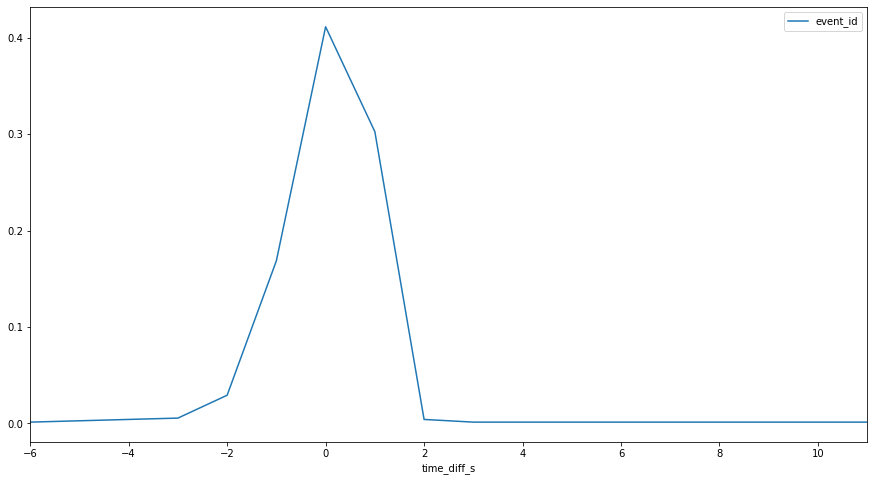

In [53]:
'''
postitive - IssueCommentEvent (PR comment) happened before PullRequestEvent - close
'''

ax = (
    df_closing_pr_with_comment
    .assign(time_diff_s=lambda d: d.time_diff / pd.to_timedelta("1s"))
    .groupby('time_diff_s').count()[['event_id']]
    .assign(event_id=lambda d: d.event_id/d.event_id.sum())
    .plot(figsize=(15,8))
)
ax.set(xlim=(-6,11))

In [54]:
all_events_num = df_closing_pr_with_comment.groupby('event_id',as_index=False).count().shape[0]
pair_events_num = (
    df_closing_pr_with_comment[(df_closing_pr_with_comment['time_diff'] <= UPPER_TIME_THRESHOLD) & 
                               (df_closing_pr_with_comment['time_diff'] >= LOWER_TIME_THRESHOLD)]
    .groupby('event_id',as_index=False)
    .count()
    .shape[0]
)
all_events.append(all_events_num)
pair_events.append(pair_events_num)
print(f'{(pair_events_num/all_events_num)*100}% events are occurring together')

92.14586255259466% events are occurring together


In [55]:
list_event_id_covered.extend(df_closing_pr_with_comment['event_id'].to_list())
list_event_id_covered.extend(df_closing_pr_with_comment['comm_event_id'].astype('int').to_list())

pr_close_with_comment = []
pr_close_with_comment.extend(df_closing_pr_with_comment['event_id'].to_list())
pr_close_with_comment.extend(df_closing_pr_with_comment['comm_event_id'].astype('int').to_list())

df_closing_pr_with_comment_proc = (
    df_closing_pr_with_comment
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(created_at=lambda d: d.PR_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: d.PR_updated_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(activity='Closing pull request')
    .assign(status="closed")
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(pr_commits=lambda d: d.num_commits.astype('int'))
    .assign(pr_changed_files=lambda d: d.num_changed_files.astype('int'))
    .assign(length=lambda d: np.where(d.comm_comment.str.len()>0, d.comm_comment.str.len(), 0))
    [['date','contributor','activity','repository','id','title','status','merged','comments',
      'pr_commits','pr_changed_files','length','PR_node_id','comm_comment_node_id','created_at','closed_at','acc_type']]
)

df_closing_pr_with_comment_proc['pull_request'] = (
    df_closing_pr_with_comment_proc
    .rename(columns={'PR_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_closing_pr_with_comment_proc['conversation']=df_closing_pr_with_comment_proc[['comments']].to_dict('records')
df_closing_pr_with_comment_proc['comment'] = (
    df_closing_pr_with_comment_proc
    .rename(columns={'comm_comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_closing_pr_with_comment_proc['payload'] = df_closing_pr_with_comment_proc[['pr_commits','pr_changed_files']].to_dict('records')
df_closing_pr_with_comment_proc=df_closing_pr_with_comment_proc.sort_values('date')

display(df_closing_pr_with_comment_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comm_comment_node_id','id',
                                                                  'title','created_at','status','closed_at','merged','PR_node_id','comments']])

dict_closing_pr_with_comment_bot=df_closing_pr_with_comment_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                           'repository','comment','pull_request',
                                                                                           'conversation','payload']].to_dict('records')
dict_closing_pr_with_comment_human=df_closing_pr_with_comment_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                               'repository','comment','pull_request',
                                                                                               'conversation','payload']].to_dict('records')

,date,activity,contributor,repository,length,comm_comment_node_id,id,title,created_at,status,closed_at,merged,PR_node_id,comments
49972,2022-11-25T16:38:17+00:00,Closing pull request,kubevirt-bot,kubevirt/kubevirt,646,IC_kwDOBJIk985PIt97,7816,"[release-0.53] test, Fail on namespace creatio...",2022-05-29T07:22:25+00:00,closed,2022-11-25T16:38:17+00:00,False,PR_kwDOBJIk9844ovFJ,8
66070,2022-11-25T18:49:03+00:00,Closing pull request,typescript-bot,DefinitelyTyped/DefinitelyTyped,249,IC_kwDOAFz6BM5PJG4x,62870,[node-telegram-bot-api] unmatched type fix .,2022-10-25T10:13:15+00:00,closed,2022-11-25T18:49:02+00:00,False,PR_kwDOAFz6BM5BfLyx,6
66068,2022-11-25T18:49:09+00:00,Closing pull request,typescript-bot,DefinitelyTyped/DefinitelyTyped,249,IC_kwDOAFz6BM5PJG7l,62328,[qunit] Add `test.each()`,2022-09-19T17:34:28+00:00,closed,2022-11-25T18:49:08+00:00,False,PR_kwDOAFz6BM4_N5ib,19
66143,2022-11-26T02:15:43+00:00,Closing pull request,typescript-bot,DefinitelyTyped/DefinitelyTyped,248,IC_kwDOAFz6BM5PJxUj,62858,chore (node-fetch): remove redundant types,2022-10-24T18:57:51+00:00,closed,2022-11-26T02:15:42+00:00,False,PR_kwDOAFz6BM5BcCo_,21
130880,2022-11-26T05:03:52+00:00,Closing pull request,istio-policy-bot,istio/istio,416,IC_kwDOBGvVPc5PJ2N7,41250,Minor refactoring after https://github.com/ist...,2022-10-03T15:02:03+00:00,closed,2022-11-26T05:03:51+00:00,False,PR_kwDOBGvVPc5AEFoS,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,2023-01-25T07:46:32+00:00,Closing pull request,gatsbot[bot],gatsbyjs/gatsby-starter-default,681,IC_kwDOAllwSM5To2Do,247,chore(deps): bump ua-parser-js from 0.7.32 to ...,2023-01-25T07:46:28+00:00,closed,2023-01-25T07:46:31+00:00,False,PR_kwDOAllwSM5IfVOa,1
4684,2023-01-25T07:46:33+00:00,Closing pull request,gatsbot[bot],gatsbyjs/gatsby-starter-minimal,681,IC_kwDOEGBJXM5To2D0,10,chore(deps): bump ua-parser-js from 0.7.32 to ...,2023-01-25T07:46:29+00:00,closed,2023-01-25T07:46:32+00:00,False,PR_kwDOEGBJXM5IfVOf,1
51171,2023-01-25T08:46:10+00:00,Closing pull request,jacogr,polkadot-js/common,137,IC_kwDOBqDjJs5TpDES,1689,add French mnemonic file,2022-12-06T07:11:48+00:00,closed,2023-01-25T08:46:10+00:00,False,PR_kwDOBqDjJs5EcenO,5
19831,2023-01-25T09:44:47+00:00,Closing pull request,metal3-io-bot,metal3-io/metal3-dev-env,515,IC_kwDOCv4C6M5TpUcZ,1142,Update dependency kubernetes/kubernetes to v1....,2023-01-23T23:49:55+00:00,closed,2023-01-25T09:44:46+00:00,False,PR_kwDOCv4C6M5IYCLC,7


In [56]:
df_pr_close_no_merge_without_comment = (
    df_events
    .query('event_type == "PullRequestEvent" and action == "closed" and merged == False and \
            event_id not in @pr_close_with_comment and \
            event_id not in @pr_close_event_covered and \
            event_id not in @pr_close_push_event_covered')
    [['event_id','event_type','login','repository','created_at','PR_created_at','PR_updated_at','PR_number','merged','draft','num_comments',
      'num_commits','num_changed_files','num_review_comments','title','PR_node_id','acc_type']]
)

list_event_id_covered.extend(df_pr_close_no_merge_without_comment['event_id'].to_list())

pr_close_without_comment = []
pr_close_without_comment.extend(df_pr_close_no_merge_without_comment['event_id'].to_list())

df_pr_close_no_merge_without_comment_proc = (
    df_pr_close_no_merge_without_comment
    .rename(columns={'login': 'contributor', 
                     'created_at': 'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(created_at=lambda d: d.PR_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: d.PR_updated_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(activity='Closing pull request')
    .assign(status="closed")
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(comments=lambda d: (d.num_comments + 1).astype('int'))
    .assign(pr_commits=lambda d: d.num_commits.astype('int'))
    .assign(pr_changed_files=lambda d: d.num_changed_files.astype('int'))
    .assign(length=0)
    .assign(comment_node_id=None)
    [['date','contributor','activity','repository','id','title','status','merged','comments','pr_commits',
      'pr_changed_files','length','created_at','closed_at','PR_node_id','comment_node_id','acc_type']]
)
df_pr_close_no_merge_without_comment_proc['pull_request'] = (
    df_pr_close_no_merge_without_comment_proc
    .rename(columns={'PR_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_pr_close_no_merge_without_comment_proc['conversation']=df_pr_close_no_merge_without_comment_proc[['comments']].to_dict('records')
df_pr_close_no_merge_without_comment_proc['comment'] = (
    df_pr_close_no_merge_without_comment_proc
    .rename(columns={'comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_pr_close_no_merge_without_comment_proc['payload'] = df_pr_close_no_merge_without_comment_proc[['pr_commits','pr_changed_files']].to_dict('records')
df_pr_close_no_merge_without_comment_proc=df_pr_close_no_merge_without_comment_proc.sort_values('date')

display(df_pr_close_no_merge_without_comment_proc.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comment_node_id',
                                                                            'id','title','created_at','status','closed_at','merged','PR_node_id','comments']])

dict_pr_close_no_merge_without_comment_bot=df_pr_close_no_merge_without_comment_proc.query('acc_type=="bot"')[['date','activity','contributor',
                                                                                                                'repository','comment',
                                                                                                                'pull_request','conversation',
                                                                                                                'payload']].to_dict('records')
dict_pr_close_no_merge_without_comment_human=df_pr_close_no_merge_without_comment_proc.query('acc_type=="human"')[['date','activity','contributor',
                                                                                                                   'repository','comment',
                                                                                                                   'pull_request','conversation',
                                                                                                                   'payload']].to_dict('records')

,date,activity,contributor,repository,length,comment_node_id,id,title,created_at,status,closed_at,merged,PR_node_id,comments
134149,2022-11-25T10:01:41+00:00,Closing pull request,restyled-io[bot],tediorewf/computer-graphics,0,None,83,Restyle Доработки по текстурированию,2022-11-25T10:01:10+00:00,closed,2022-11-25T10:01:40+00:00,False,PR_kwDOH5Sl_85Dshqd,1
144170,2022-11-25T10:16:58+00:00,Closing pull request,regro-cf-autotick-bot,conda-forge/pyflyby-feedstock,0,None,14,pyflyby v1.8.0,2022-10-12T09:07:05+00:00,closed,2022-11-25T10:16:57+00:00,False,PR_kwDOEH-wuc5Aoicq,3
40651,2022-11-25T11:18:59+00:00,Closing pull request,engine-flutter-autoroll,flutter/flutter,0,None,116013,Roll Flutter Engine from 7665ae51846f to 2f04c...,2022-11-25T09:06:05+00:00,closed,2022-11-25T11:18:59+00:00,False,PR_kwDOAeUeuM5DsUEX,5
40646,2022-11-25T11:31:00+00:00,Closing pull request,engine-flutter-autoroll,flutter/flutter,0,None,116016,Roll Flutter Engine from 7665ae51846f to 2f04c...,2022-11-25T11:20:04+00:00,closed,2022-11-25T11:30:59+00:00,False,PR_kwDOAeUeuM5Ds5iY,3
4667,2022-11-25T12:06:17+00:00,Closing pull request,graalvmbot,oracle/graal,0,None,5481,[GR-38783] Deploy graalvm artifacts to artifac...,2022-11-22T17:28:51+00:00,closed,2022-11-25T12:06:16+00:00,False,PR_kwDOAvXJDs5De3E7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59710,2023-01-25T15:17:34+00:00,Closing pull request,regro-cf-autotick-bot,conda-forge/libxmlpp-feedstock,0,None,17,libxmlpp v5.0.2,2022-12-07T07:38:30+00:00,closed,2023-01-25T15:17:33+00:00,False,PR_kwDOA34Hgs5EmeKB,3
41109,2023-01-25T15:22:56+00:00,Closing pull request,skia-flutter-autoroll,flutter/engine,0,None,39128,Roll Dart SDK from de14a48187ce to d9151e59f70...,2023-01-25T15:19:02+00:00,closed,2023-01-25T15:22:55+00:00,False,PR_kwDOAlZRSc5Ihc_x,3
59686,2023-01-25T16:21:17+00:00,Closing pull request,regro-cf-autotick-bot,conda-forge/sphinxcontrib-openapi-feedstock,0,None,6,sphinxcontrib-openapi v0.8.1,2023-01-25T03:16:37+00:00,closed,2023-01-25T16:21:16+00:00,False,PR_kwDOCI-nMs5IerG0,3
59683,2023-01-25T16:21:43+00:00,Closing pull request,regro-cf-autotick-bot,conda-forge/psrchive-feedstock,0,None,32,Rebuild for PyPy3.8 and PyPy3.9,2023-01-25T07:01:19+00:00,closed,2023-01-25T16:21:42+00:00,False,PR_kwDOE9cc1s5IfLQh,3


In [57]:
closing_pullrequest_bot = []
closing_pullrequest_bot.extend(dict_pr_close_with_push_bot)
closing_pullrequest_bot.extend(dict_pr_close_merge_no_push_proc_bot)
closing_pullrequest_bot.extend(dict_closing_pr_with_comment_bot)
closing_pullrequest_bot.extend(dict_pr_close_no_merge_without_comment_bot)

closing_pullrequest_human = []
closing_pullrequest_human.extend(dict_pr_close_with_push_human)
closing_pullrequest_human.extend(dict_pr_close_merge_no_push_proc_human)
closing_pullrequest_human.extend(dict_closing_pr_with_comment_human)
closing_pullrequest_human.extend(dict_pr_close_no_merge_without_comment_human)

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/closing_pullrequest.json'
    with open(file_name, 'w') as file_object:
        json.dump(closing_pullrequest_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/closing_pullrequest.json'
    with open(file_name, 'w') as file_object:
        json.dump(closing_pullrequest_human, file_object, indent=4)

#### Commenting under pull request

In [58]:
'''
Filter the events based on IssueCommentEvent, where the PR_number field is not NA
'''
df_issue_and_pr_commenting = (
    df_events
    .query('event_type == "IssueCommentEvent" and \
    event_id not in @pr_close_with_comment and \
    event_id not in @pr_reop_comm_event_covered')
)
df_pr_commenting = (
    df_issue_and_pr_commenting[df_issue_and_pr_commenting['PR_number'].notnull()]
    [['event_id','event_type','login','repository','created_at','title','body','state','draft','issue_created_at','issue_closed_at',
      'num_comments','comment','PR_number','PR_merged_at','issue_node_id','comment_node_id','acc_type']]
)
df_pr_commenting = (
    df_pr_commenting
    .sort_values(['login','repository','created_at'])
    .rename(columns={'login': 'contributor',
                     'created_at': 'date',})
    .assign(activity = "Commenting pull request")
    .assign(status=lambda d: d.state)
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(created_at=lambda d: d.issue_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: np.where(d.issue_closed_at.notnull(), d.issue_closed_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat())
                                         , None))
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(merged=lambda d: np.where(d.PR_merged_at.notnull(), True, False))
    .assign(comments=lambda d: d.num_comments.fillna(0).astype('int'))
    .assign(length=lambda d: np.where(d.comment.str.len()>0, d.comment.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
)
df_pr_commenting['pull_request'] = (
    df_pr_commenting
    .rename(columns={'issue_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_pr_commenting['conversation']=df_pr_commenting[['comments']].to_dict('records')
df_pr_commenting['comment'] = (
    df_pr_commenting
    .rename(columns={'comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_pr_commenting=df_pr_commenting.sort_values('date')
list_event_id_covered.extend(df_pr_commenting['event_id'].to_list())

display(df_pr_commenting.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comment_node_id',
                                                   'id','title','created_at','status','closed_at','merged','issue_node_id','comments']])

#saving bot events
dict_pr_commenting_bot=df_pr_commenting.query('acc_type=="bot"')[['date','activity','contributor','repository','comment',
                                                                      'pull_request','conversation']].to_dict('records')
#saving human events
dict_pr_commenting_human=df_pr_commenting.query('acc_type=="human"')[['date','activity','contributor','repository','comment',
                                                                      'pull_request','conversation']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/commenting_pullrequest.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_pr_commenting_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/commenting_pullrequest.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_pr_commenting_human, file_object, indent=4)

,date,activity,contributor,repository,length,comment_node_id,id,title,created_at,status,closed_at,merged,issue_node_id,comments
129978,2022-11-25T09:55:19+00:00,Commenting pull request,AmplabJenkins,apache/spark,40,IC_kwDOAQXtWs5PHEhk,38782,[SPARK-38728][SQL] Test the error class: FAILE...,2022-11-24T04:42:12+00:00,open,None,False,PR_kwDOAQXtWs5DnXue,2
129977,2022-11-25T09:55:23+00:00,Commenting pull request,AmplabJenkins,apache/spark,40,IC_kwDOAQXtWs5PHEj2,38781,[SPARK-41246][core] Solve the problem of RddId...,2022-11-24T04:37:11+00:00,open,None,False,PR_kwDOAQXtWs5DnXKk,1
129976,2022-11-25T09:55:26+00:00,Commenting pull request,AmplabJenkins,apache/spark,40,IC_kwDOAQXtWs5PHEl_,38780,[SPARK-41185][K8S][DOCS] Remove ARM limitation...,2022-11-24T04:05:07+00:00,open,None,False,PR_kwDOAQXtWs5DnSV0,3
104470,2022-11-25T09:55:27+00:00,Commenting pull request,analysis-bot,facebook/react-native,204,IC_kwDOAbrxp85PHEmN,35471,fix: update CircleCI config to use the RN vers...,2022-11-25T09:23:54+00:00,open,None,False,PR_kwDOAbrxp85DsYZI,1
72966,2022-11-25T09:57:13+00:00,Commenting pull request,codesandbox[bot],WordPress/gutenberg,774,IC_kwDOBNHdeM5PHFqa,46048,Fix column block category,2022-11-25T09:57:11+00:00,open,None,False,PR_kwDOBNHdeM5Dsgjb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23969,2023-01-25T17:01:47+00:00,Commenting pull request,tekton-robot,tektoncd/pipeline,2285,IC_kwDOCL2Q_s5TrmCY,6002,[TEP074] Remove Image pipelineResources,2023-01-17T23:35:22+00:00,open,None,False,PR_kwDOCL2Q_s5HlWh5,24
36112,2023-01-25T17:02:18+00:00,Commenting pull request,codeclimate[bot],usdigitalresponse/usdr-gost,363,IC_kwDOGqj_485TrmOD,847,700 upload agencies front end,2023-01-23T01:16:09+00:00,open,None,False,PR_kwDOGqj_485ISfiz,1
69968,2023-01-25T17:02:37+00:00,Commenting pull request,cloudflare-pages[bot],arlac77/svelte-session-manager,531,IC_kwDODAHEH85TrmZl,1399,chore(deps): bump mf-styling from 1.7.37 to 1....,2023-01-25T17:02:34+00:00,open,None,False,PR_kwDODAHEH85Ih-x_,2
36711,2023-01-25T17:02:38+00:00,Commenting pull request,codesandbox[bot],toeverything/blocksuite,795,IC_kwDOH-UIqs5Trmab,850,fix(blocks): forbid user to delete a block ins...,2023-01-25T17:02:35+00:00,open,None,False,PR_kwDOH-UIqs5Ih-yb,1


#### Commenting pull request changes

In [59]:
'''
Filter the events based on PullRequestReviewCommentEvent and PullRequestReviewEvent with review_state as "commented"
'''
df_pr_review_commenting = (
    df_events
    .query('(event_type == "PullRequestReviewCommentEvent") or (event_type == "PullRequestReviewEvent" and review_state == "commented")')
    [['event_id','event_type','login','repository','created_at','title','body','state','draft','PR_created_at','PR_closed_at',
      'comment','PR_merged_at','review_state','PR_node_id','comment_node_id','PR_number','acc_type']]
)

df_pr_review_commenting = (
    df_pr_review_commenting
    .rename(columns={'login':'contributor', 
                     'created_at':'date'})
    .assign(activity = "Commenting pull request changes")
    .assign(status=lambda d: d.state)
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(created_at=lambda d: d.PR_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: np.where(d.PR_closed_at.notnull(), d.PR_closed_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()), None))
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(merged=lambda d: np.where(d.PR_merged_at.notnull(), True, False))
    .assign(length=lambda d: np.where(d.comment.str.len()>0, d.comment.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
)

list_event_id_covered.extend(df_pr_review_commenting['event_id'].to_list())
df_pr_review_commenting = df_pr_review_commenting.query('event_type == "PullRequestReviewCommentEvent"') #The PullRequestReviewEvent with review_state as
                                                                                                     #commented will have an associated PRRCE for comment
df_pr_review_commenting['pull_request'] = (
    df_pr_review_commenting
    .rename(columns={'PR_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_pr_review_commenting['comment'] = (
    df_pr_review_commenting
    .rename(columns={'comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_pr_review_commenting=df_pr_review_commenting.sort_values('date')

display(df_pr_review_commenting.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comment_node_id',
                                                          'id','title','created_at','status','closed_at','merged','PR_node_id']])

#saving bot events
dict_pr_review_commenting_bot=df_pr_review_commenting.query('acc_type=="bot"')[['date','activity','contributor','repository',
                                                                                'comment','pull_request']].to_dict('records')

#saving human events
dict_pr_review_commenting_human=df_pr_review_commenting.query('acc_type=="human"')[['date','activity','contributor','repository',
                                                                                    'comment','pull_request']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/commenting_pullrequest_changes.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_pr_review_commenting_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/commenting_pullrequest_changes.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_pr_review_commenting_human, file_object, indent=4)

,date,activity,contributor,repository,length,comment_node_id,id,title,created_at,status,closed_at,merged,PR_node_id
114072,2022-11-25T10:10:14+00:00,Commenting pull request changes,codeclimate[bot],anexia-it/k8s-anexia-ccm,85,PRRC_kwDOFsQglc49hol3,142,WIP: VIP address discovery from tag,2022-11-22T14:37:41+00:00,open,None,False,PR_kwDOFsQglc5Dd5R0
114070,2022-11-25T10:10:14+00:00,Commenting pull request changes,codeclimate[bot],anexia-it/k8s-anexia-ccm,90,PRRC_kwDOFsQglc49hol6,142,WIP: VIP address discovery from tag,2022-11-22T14:37:41+00:00,open,None,False,PR_kwDOFsQglc5Dd5R0
114065,2022-11-25T10:21:10+00:00,Commenting pull request changes,codeclimate[bot],kodadot/nft-gallery,66,PRRC_kwDOE-shzc49htHN,4395,Transform top collections nuxt3 way,2022-11-24T02:02:23+00:00,open,None,False,PR_kwDOE-shzc5DnBYZ
114064,2022-11-25T10:21:10+00:00,Commenting pull request changes,codeclimate[bot],kodadot/nft-gallery,66,PRRC_kwDOE-shzc49htHT,4395,Transform top collections nuxt3 way,2022-11-24T02:02:23+00:00,open,None,False,PR_kwDOE-shzc5DnBYZ
114059,2022-11-25T10:33:58+00:00,Commenting pull request changes,codeclimate[bot],kodadot/nft-gallery,66,PRRC_kwDOE-shzc49hw_N,4395,Transform top collections nuxt3 way,2022-11-24T02:02:23+00:00,open,None,False,PR_kwDOE-shzc5DnBYZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36173,2023-01-25T14:15:04+00:00,Commenting pull request changes,codeclimate[bot],CircuitVerse/CircuitVerse,68,PRRC_kwDOCSVaMM5AxaAs,3521,fix: update ui for comment input,2023-01-24T14:22:07+00:00,open,None,False,PR_kwDOCSVaMM5IbmUC
51107,2023-01-25T15:44:43+00:00,Commenting pull request changes,jacogr,polkadot-js/apps,122,PRRC_kwDOB6xRes5Ax2QH,8883,Add bridge hub logos,2023-01-25T14:36:41+00:00,open,None,False,PR_kwDOB6xRes5IhOuc
36120,2023-01-25T16:33:05+00:00,Commenting pull request changes,codeclimate[bot],CircuitVerse/CircuitVerse,169,PRRC_kwDOCSVaMM5AyF1Y,3526,[revamp] : announcement UI,2023-01-25T16:30:37+00:00,open,None,False,PR_kwDOCSVaMM5Ih1HA
36122,2023-01-25T16:33:05+00:00,Commenting pull request changes,codeclimate[bot],CircuitVerse/CircuitVerse,75,PRRC_kwDOCSVaMM5AyF1i,3526,[revamp] : announcement UI,2023-01-25T16:30:37+00:00,open,None,False,PR_kwDOCSVaMM5Ih1HA


#### Reviewing code

In [60]:
'''
Filter the events based on PullRequestReviewEvent with review_state as "approved"/"dismissed"/"changes_requested"
'''
df_pr_review_code = (
    df_events
    .query('event_type == "PullRequestReviewEvent" and review_state != "commented"')
    [['event_id','event_type','login','repository','created_at','state','title','body','PR_created_at','PR_closed_at',
      'PR_merged_at','review_state','PR_number','PR_node_id','review_node_id','acc_type']]
)

df_pr_review_code = (
    df_pr_review_code
    .assign(activity = "Reviewing code")
    .rename(columns={'login':'contributor',
                     'created_at':'date'})
    .assign(review_status=lambda d: d.review_state)
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(status=lambda d: d.state)
    .assign(created_at=lambda d: d.PR_created_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(closed_at=lambda d: np.where(d.PR_closed_at.notnull(), d.PR_closed_at.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()), None))
    .assign(id=lambda d: d.PR_number.astype('int'))
    .assign(merged=lambda d: np.where(d.PR_merged_at.notnull(), True, False))
    .assign(length=lambda d: np.where(d.body.str.len()>0, d.body.str.len(), 0))
    .assign(length = lambda d: d.length.astype('int'))
)
df_pr_review_code['pull_request'] = (
    df_pr_review_code
    .rename(columns={'PR_node_id':'GH_node'})
    [pr_field]
    .to_dict('records')
)
df_pr_review_code['review'] = (
    df_pr_review_code
    [['review_status','review_node_id']]
    .rename(columns={'review_node_id':'GH_node',
                     'review_status':'status'})
    .to_dict('records')
)
df_pr_review_code['comment'] = (
    df_pr_review_code
    .rename(columns={'PR_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)
df_pr_review_code=df_pr_review_code.sort_values('date')

list_event_id_covered.extend(df_pr_review_code['event_id'].to_list())

display(df_pr_review_code.query('acc_type=="bot"')[['date','activity','contributor','repository','length','PR_node_id','review_status',
                                                    'review_node_id','id','title','created_at','status','closed_at','merged','PR_node_id']])

#saving bot events
dict_pr_review_code_bot=df_pr_review_code.query('acc_type=="bot"')[['date','activity','contributor','repository',
                                                                    'comment','review','pull_request']].to_dict('records')

#saving human events
dict_pr_review_code_human=df_pr_review_code.query('acc_type=="human"')[['date','activity','contributor','repository',
                                                                        'comment','review','pull_request']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/reviewing_code.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_pr_review_code_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/reviewing_code.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_pr_review_code_human, file_object, indent=4)

,date,activity,contributor,repository,length,PR_node_id,review_status,review_node_id,id,title,created_at,status,closed_at,merged,PR_node_id
882,2022-11-25T10:02:26+00:00,Reviewing code,renovate-approve-2[bot],freeCodeCamp/chapter,2207,PR_kwDODNLaYc5DsiG7,approved,PRR_kwDODNLaYc5HLJfB,1964,chore(deps): update dependency lint-staged to ...,2022-11-25T10:02:23+00:00,open,None,False,PR_kwDODNLaYc5DsiG7
881,2022-11-25T10:06:40+00:00,Reviewing code,renovate-approve-2[bot],josh-development/middlewares,59989,PR_kwDOHM8Dyc5DSvyj,dismissed,PRR_kwDOHM8Dyc5G_wRR,127,chore(deps): update all non-major dev-dependen...,2022-11-20T00:07:43+00:00,open,None,False,PR_kwDOHM8Dyc5DSvyj
880,2022-11-25T10:06:41+00:00,Reviewing code,renovate-approve-2[bot],josh-development/middlewares,59989,PR_kwDOHM8Dyc5DSvyj,approved,PRR_kwDOHM8Dyc5HLNIO,127,chore(deps): update all non-major dev-dependen...,2022-11-20T00:07:43+00:00,open,None,False,PR_kwDOHM8Dyc5DSvyj
879,2022-11-25T10:32:46+00:00,Reviewing code,renovate-approve-2[bot],ariakit/ariakit,2249,PR_kwDOBjT0Fc5DssBL,approved,PRR_kwDOBjT0Fc5HLbAh,2071,Update dependency @rollup/plugin-babel to v6.0.3,2022-11-25T10:32:43+00:00,open,None,False,PR_kwDOBjT0Fc5DssBL
878,2022-11-25T10:46:28+00:00,Reviewing code,renovate-approve-2[bot],kunyan/server-side-include,2213,PR_kwDOEBHXU85Dsvai,approved,PRR_kwDOEBHXU85HLfIn,378,chore(deps): update dependency lint-staged to ...,2022-11-25T10:46:26+00:00,open,None,False,PR_kwDOEBHXU85Dsvai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66704,2023-01-25T16:34:28+00:00,Reviewing code,renovate-approve-2[bot],dev-hato/deploy-webhook,2526,PR_kwDOHrCdBs5Ih2WZ,approved,PRR_kwDOHrCdBs5LrjUj,551,Update dependency textlint to v12.6.1,2023-01-25T16:34:25+00:00,open,None,False,PR_kwDOHrCdBs5Ih2WZ
66703,2023-01-25T16:35:22+00:00,Reviewing code,renovate-approve-2[bot],dev-hato/hato-atama,2522,PR_kwDOEeATuM5Ih2mL,approved,PRR_kwDOEeATuM5Lrj5y,2423,Update dependency textlint to v12.6.1,2023-01-25T16:35:19+00:00,open,None,False,PR_kwDOEeATuM5Ih2mL
26495,2023-01-25T16:37:02+00:00,Reviewing code,fluttergithubbot,flutter/flutter,767,PR_kwDOAeUeuM5Ih2se,approved,PRR_kwDOAeUeuM5Lrklo,119159,Roll Flutter Engine from 6f806491e103 to 24aa3...,2023-01-25T16:35:40+00:00,open,None,False,PR_kwDOAeUeuM5Ih2se
26494,2023-01-25T16:57:06+00:00,Reviewing code,fluttergithubbot,flutter/engine,880,PR_kwDOAlZRSc5Ih8rA,approved,PRR_kwDOAlZRSc5Lrs3j,39131,Roll Skia from c4b171fe5668 to 876b045881a6 (2...,2023-01-25T16:56:34+00:00,open,None,False,PR_kwDOAlZRSc5Ih8rA


#### Commenting in commits

In [61]:
'''
Filter the events based on CommitCommentEvent
'''
df_commit_commenting = (
    df_events
    .query('event_type == "CommitCommentEvent"')
    [['event_id','event_type','login','repository','created_at','comment_node_id','commit_id','body','acc_type']]
)
df_commit_commenting = (
    df_commit_commenting
    .assign(activity = "Commenting commit")
    .rename(columns={'login':'contributor',
                     'created_at':'date',
                     'commit_id':'name'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(length=lambda d: np.where(d.body.str.len()>0, d.body.str.len(), 0))
    .assign(tag_description_length=None)
    .assign(type='commit')
)
df_commit_commenting['comment'] = (
    df_commit_commenting
    .rename(columns={'comment_node_id':'GH_node'})
    [['length','GH_node']]
    .to_dict('records')
)

df_commit_commenting['gitref'] = (
    df_commit_commenting
    [gitref]
    .rename(columns={'tag_description_length':'description_length'})
    .to_dict('records')
)
df_commit_commenting=df_commit_commenting.sort_values('date')

list_event_id_covered.extend(df_commit_commenting['event_id'].to_list())

display(df_commit_commenting.query('acc_type=="bot"')[['date','activity','contributor','repository','length','comment_node_id','type',
                                                       'name','tag_description_length']])

#saving bot events
dict_commit_commenting_bot=df_commit_commenting.query('acc_type=="bot"')[['date','activity','contributor','repository','comment',
                                                                          'gitref']].to_dict('records')

#saving human events
dict_commit_commenting_human=df_commit_commenting.query('acc_type=="human"')[['date','activity','contributor','repository','comment',
                                                                              'gitref']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/commenting_commits.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_commit_commenting_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/commenting_commits.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_commit_commenting_human, file_object, indent=4)

,date,activity,contributor,repository,length,comment_node_id,type,name,tag_description_length
21456,2022-11-25T15:19:33+00:00,Commenting commit,cypress-bot[bot],cypress-io/cypress,435,CC_kwDOAeKht84Fbbbn,commit,b04f9a1143095bf859c9352e93921bedae8e0f8e,None
21455,2022-11-25T15:24:15+00:00,Commenting commit,cypress-bot[bot],cypress-io/cypress,431,CC_kwDOAeKht84Fbbh_,commit,b04f9a1143095bf859c9352e93921bedae8e0f8e,None
21454,2022-11-25T15:39:40+00:00,Commenting commit,cypress-bot[bot],cypress-io/cypress,433,CC_kwDOAeKht84Fbb16,commit,b04f9a1143095bf859c9352e93921bedae8e0f8e,None
21453,2022-11-25T15:55:04+00:00,Commenting commit,cypress-bot[bot],cypress-io/cypress,431,CC_kwDOAeKht84FbcL3,commit,b04f9a1143095bf859c9352e93921bedae8e0f8e,None
81726,2022-11-25T20:21:35+00:00,Commenting commit,phpmyadmin-bot,scottmcgowan24/phpmyadmin,334,CC_kwDOGNKPGM4FbhZ3,commit,6fc1401ee285711786d1fbdb1946569428a0a60e,None
...,...,...,...,...,...,...,...,...,...
58040,2023-01-24T23:14:12+00:00,Commenting commit,poggit-bot,AID-LEARNING/RolesManager,1201,CC_kwDOIyEXzs4F1sxK,commit,b9b9474ff2ff13a454d82c6dbb7df7a3427712d3,None
58039,2023-01-24T23:15:17+00:00,Commenting commit,poggit-bot,AID-LEARNING/RolesManager,1201,CC_kwDOIyEXzs4F1sym,commit,8b416b206f86cc51bebb5ff859eb84e9dcce4c16,None
19409,2023-01-25T14:20:52+00:00,Commenting commit,pantheon-ci-bot,pantheon-ci-bot/build-tools-5596,320,CC_kwDOI1vJ284F2AsO,commit,bd1d3febe2bda72781641c3d4c06fe75b292dba6,None
22766,2023-01-25T16:55:08+00:00,Commenting commit,cypress-bot[bot],cypress-io/cypress,415,CC_kwDOAeKht84F2Fok,commit,371c73fb636483f56ea43bc306a939ebba84db8e,None


#### Pushing commits

In [62]:
'''
Filter the events based on PushEvent, remove the events that are already covered in pull request close event
'''
pushing_commits = (
    df_events
    .query('event_type == "PushEvent" and event_id not in @pr_close_push_event_covered')
    [['event_id','event_type','login','repository','created_at','commit_size','commit_distinct_size','push_id','acc_type']]
    .assign(activity = "Pushing commits")
    .rename(columns={'login':'contributor', 
                     'created_at':'date'})
    .assign(date=lambda d: d.date.dt.tz_localize(tz='UTC').map(lambda x: x.isoformat()))
    .assign(pushed_commits=lambda d: d.commit_size.astype('int'))
    .assign(pushed_distinct_commits=lambda d: d.commit_distinct_size.astype('int'))
    .assign(GH_push_id=lambda d: d.push_id.astype('int'))
)

list_event_id_covered.extend(pushing_commits['event_id'].to_list())

pushing_commits['payload']=pushing_commits[['pushed_commits','pushed_distinct_commits','GH_push_id']].to_dict('records')

pushing_commits=pushing_commits.sort_values('date')

display(pushing_commits.query('acc_type=="bot"')[['date','activity','contributor','repository','pushed_commits','pushed_distinct_commits','GH_push_id']])

#saving bot events
dict_pushing_commits_bot=pushing_commits.query('acc_type=="bot"')[['date','activity','contributor','repository','payload']].to_dict('records')

#saving human events
dict_pushing_commits_human=pushing_commits.query('acc_type=="human"')[['date','activity','contributor','repository','payload']].to_dict('records')

if JSON_FOR_EACH_ACTIVITY:
    file_name = f'{loc}/Activity/bot_activities/pushing_commits.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_pushing_commits_bot, file_object, indent=4)

    file_name = f'{loc}/Activity/human_activities/pushing_commits.json'
    with open(file_name, 'w') as file_object:
        json.dump(dict_pushing_commits_human, file_object, indent=4)

,date,activity,contributor,repository,pushed_commits,pushed_distinct_commits,GH_push_id
94965,2022-11-25T09:55:47+00:00,Pushing commits,neos-bot,neos/neos-ui-compiled,1,1,11784145561
4671,2022-11-25T09:58:53+00:00,Pushing commits,graalvmbot,oracle/graalpython,4,4,11784177783
50061,2022-11-25T10:00:01+00:00,Pushing commits,kubevirt-bot,kubevirt/ci-health,1,1,11784189605
122266,2022-11-25T10:00:08+00:00,Pushing commits,vscode-issue-tracker-bot,lannonbr/vscode-issue-tracker,1,1,11784191149
25669,2022-11-25T10:00:09+00:00,Pushing commits,dune-community-bot,dune-mirrors/dune-fem,1,1,11784191383
...,...,...,...,...,...,...,...
41101,2023-01-25T16:56:36+00:00,Pushing commits,skia-flutter-autoroll,skia-flutter-autoroll/engine,1000,2,12401169947
41639,2023-01-25T16:56:59+00:00,Pushing commits,engine-flutter-autoroll,engine-flutter-autoroll/flutter,1000,2,12401173899
62774,2023-01-25T17:00:07+00:00,Pushing commits,vscode-issue-tracker-bot,lannonbr/vscode-issue-tracker,1,1,12401209784
59673,2023-01-25T17:00:31+00:00,Pushing commits,regro-cf-autotick-bot,regro/cf-graph-countyfair,1,1,12401215121


### Saving human and bot activities in a separate file

In [63]:
'''
Combine all the dictionary of activities, sort them according to date,contributor and repository 
'''
bot_activities = []
bot_activities.extend(dict_create_repository_bot)
bot_activities.extend(dict_create_branch_bot)
bot_activities.extend(dict_release_with_create_bot)
bot_activities.extend(dict_release_without_create_bot)
bot_activities.extend(dict_create_tag_bot)
bot_activities.extend(dict_delete_tag_bot)
bot_activities.extend(dict_delete_branch_bot)
bot_activities.extend(dict_public_event_bot)
bot_activities.extend(dict_member_event_bot)
bot_activities.extend(dict_forking_repository_bot)
bot_activities.extend(dict_starring_repository_bot)
bot_activities.extend(dict_wiki_page_bot)
bot_activities.extend(dict_transfering_open_issue_bot)
bot_activities.extend(dict_opening_issue_bot)
bot_activities.extend(dict_closing_issue_with_comment_bot)
bot_activities.extend(dict_closing_issue_without_comment_bot)
bot_activities.extend(dict_reopening_issue_with_comment_bot)
bot_activities.extend(dict_reopening_issue_without_comment_bot)
bot_activities.extend(dict_issue_commenting_bot)
bot_activities.extend(dict_opening_pullrequest_bot)
bot_activities.extend(dict_reopening_pr_with_comment_bot)
bot_activities.extend(dict_reopening_pr_without_comment_bot)
bot_activities.extend(dict_pr_close_with_push_bot)
bot_activities.extend(dict_pr_close_merge_no_push_proc_bot)
bot_activities.extend(dict_closing_pr_with_comment_bot)
bot_activities.extend(dict_pr_close_no_merge_without_comment_bot)
bot_activities.extend(dict_pr_commenting_bot)
bot_activities.extend(dict_pr_review_commenting_bot)
bot_activities.extend(dict_pr_review_code_bot)
bot_activities.extend(dict_commit_commenting_bot)
bot_activities.extend(dict_pushing_commits_bot)


human_activities = []
human_activities.extend(dict_create_repository_human)
human_activities.extend(dict_create_branch_human)
human_activities.extend(dict_release_with_create_human)
human_activities.extend(dict_release_without_create_human)
human_activities.extend(dict_create_tag_human)
human_activities.extend(dict_delete_tag_human)
human_activities.extend(dict_delete_branch_human)
human_activities.extend(dict_public_event_human)
human_activities.extend(dict_member_event_human)
human_activities.extend(dict_forking_repository_human)
human_activities.extend(dict_starring_repository_human)
human_activities.extend(dict_wiki_page_human)
human_activities.extend(dict_transfering_open_issue_human)
human_activities.extend(dict_opening_issue_human)
human_activities.extend(dict_closing_issue_with_comment_human)
human_activities.extend(dict_closing_issue_without_comment_human)
human_activities.extend(dict_reopening_issue_with_comment_human)
human_activities.extend(dict_reopening_issue_without_comment_human)
human_activities.extend(dict_issue_commenting_human)
human_activities.extend(dict_opening_pullrequest_human)
human_activities.extend(dict_reopening_pr_with_comment_human)
human_activities.extend(dict_reopening_pr_without_comment_human)
human_activities.extend(dict_pr_close_with_push_human)
human_activities.extend(dict_pr_close_merge_no_push_proc_human)
human_activities.extend(dict_closing_pr_with_comment_human)
human_activities.extend(dict_pr_close_no_merge_without_comment_human)
human_activities.extend(dict_pr_commenting_human)
human_activities.extend(dict_pr_review_commenting_human)
human_activities.extend(dict_pr_review_code_human)
human_activities.extend(dict_commit_commenting_human)
human_activities.extend(dict_pushing_commits_human)

bot_activities = sorted(bot_activities, key=lambda x: "%s %s %s" % (x['date'], x['contributor'], x['repository']))
human_activities = sorted(human_activities, key=lambda x: "%s %s %s" % (x['date'], x['contributor'], x['repository']))

In [64]:
file_name = f'{loc}/bot_activities.json'
with open(file_name, 'w') as file_object:
    json.dump(bot_activities, file_object, indent=4)

file_name = f'{loc}/human_activities.json'
with open(file_name, 'w') as file_object:
    json.dump(human_activities, file_object, indent=4)

In [65]:
percentage_pair_events_considered = sum(pair_events)*100/sum(all_events)
print(f'{percentage_pair_events_considered}% of all the events are considered to be from same activity \
among all the events that might belog to the same activity')

82.95574918845037% of all the events are considered to be from same activity among all the events that might belog to the same activity


In [66]:
num_events_covered = list(set(list_event_id_covered))
print(len(num_events_covered))

617549


In [67]:
df_events.drop_duplicates(['event_id']).shape

(617549, 46)

In [68]:
event_to_be_covered = df_events.query('event_id not in @num_events_covered')
with option_context('display.max_column',None):
    display(event_to_be_covered)

,event_id,event_type,login,action,created_at,repository,issue_number,state,issue_created_at,issue_closed_at,close_reason,issue_node_id,PR_number,PR_created_at,PR_updated_at,PR_closed_at,PR_merged_at,merged,PR_node_id,comment,num_comments,num_commits,num_review_comments,review_node_id,review_state,num_changed_files,comment_node_id,title,body,draft,tag_name,tag_description,release_name,prerelease,ref_type,ref,page_name,page_title,description,release_node_id,push_id,commit_distinct_size,commit_id,commit_size,release_created_at,acc_type
